# Project Task 1 : Data Exploration and Processing
#### Gruppe: B (Joseph Weibel / Rebecka Fahrni)

In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = load_dataset('argilla/medical-domain')['train']
df = data.to_pandas()

# add label and text length 
df['label'] = df.prediction.apply(lambda x: x[0]['label'])
df['text_length'] = df.metrics.apply(lambda x: x['text_length'])
df.head()



C:\Users\Reby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


text  \
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
1  CLINICAL INDICATION:  ,Normal stress test.,PRO...   
2  FINDINGS:,Axial scans were performed from L1 t...   
3  PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...   
4  REASON FOR VISIT:  ,Elevated PSA with nocturia...   

                                              inputs  \
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
1  {'text': 'CLINICAL INDICATION:  ,Normal stress...   
2  {'text': 'FINDINGS:,Axial scans were performed...   
3  {'text': 'PREOPERATIVE DIAGNOSIS: , Blood loss...   
4  {'text': 'REASON FOR VISIT:  ,Elevated PSA wit...   

                                          prediction prediction_agent  \
0     [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla   
1              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
2            [{'label': ' Radiology', 'score': 1.0}]          Argilla   
3              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
4  [{'label': ' SOAP / Chart / Progress Notes', '...          Argilla   

  annotation annotation_agent  multi_label explanation  \
0       None             None        False        None   
1       None             None        False        None   
2       None             None        False        None   
3       None             None        False        None   
4       None             None        False        None   

                                     id metadata   status  \
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
1  0007edf0-1413-4b16-8212-3a13c2ab4e43     None  Default   
2  00097d1e-1357-4447-a39a-fe8f8b7c36ae     None  Default   
3  001622b6-0182-4fee-9881-ae15e81ce836     None  Default   
4  0029245f-8b45-4796-ba09-7760612289c6     None  Default   

             event_timestamp                metrics  \
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   
1 2022-12-07 09:33:53.387245  {'text_length': 1798}   
2 2022-12-07 09:35:25.277951  {'text_length': 1141}   
3 2022-12-07 09:34:15.982054  {'text_length': 1767}   
4 2022-12-07 09:34:59.528244  {'text_length': 1519}   

                            label  text_length  
0                Gastroenterology         1085  
1                         Surgery         1798  
2                       Radiology         1141  
3                         Surgery         1767  
4   SOAP / Chart / Progress Notes         1519

## Exploration of datasets 

### calculating basic statistics 
- number of samples and number of samples per class: is  dataset balanced?
- min / avg / max length of text

In [2]:
import pandas as pd

total_samples = len(df)

samples_per_class = df['label'].value_counts() 

print(samples_per_class)
print('Total samples: ', total_samples)


label
 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry         

Based on the output of the `samples_per_class` variable, we can see that the dataset is not balanced. The number of samples per class varies greatly, with the highest number of samples belonging to the "Surgery" class (1088 samples) and the lowest number of samples belonging to the "Hospice - Palliative Care" class (6 samples). 

This imbalance in the dataset could potentially lead to biased model performance, as the model may be more likely to predict the majority class. Therefore, it may be necessary to balance the dataset by oversampling the minority classes or undersampling the majority class. 

Further analysis of the dataset could also be performed, such as examining the distribution of text lengths and the frequency of tokens in each class, to gain a better understanding of the data and inform preprocessing decisions.

Min length:  11
Avg length:  3052.314
Max length:  18425


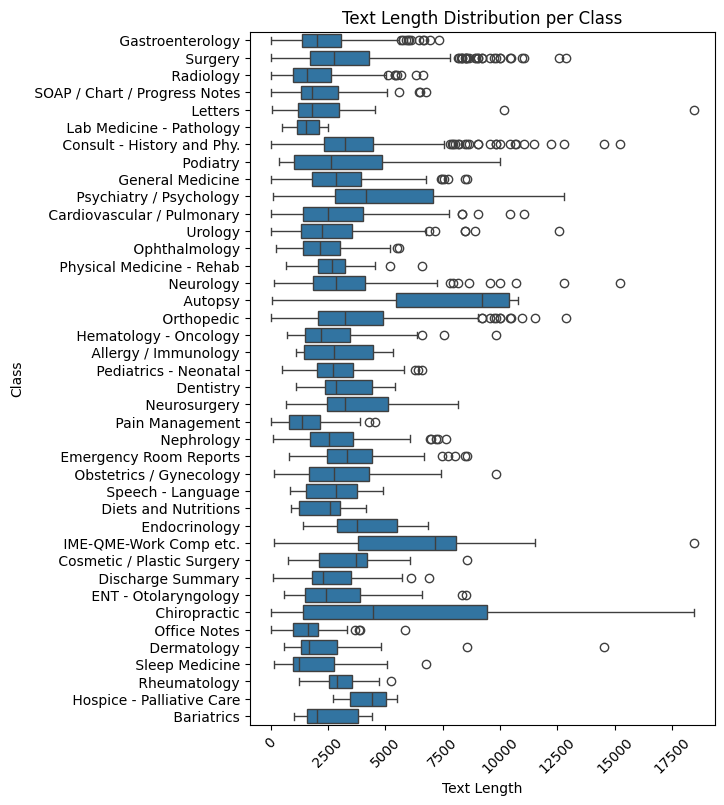

In [36]:
# Text lengths
lengths = df['text'].apply(len)
min_length = lengths.min()
avg_length = lengths.mean()
max_length = lengths.max()
print('Min length: ', min_length)
print('Avg length: ', avg_length.round(3))
print('Max length: ', max_length)

# Text lengths per class
lengths_per_class = df.groupby('label')['text'].apply(lambda x: x.str.len())
min_length_per_class = lengths_per_class.min()
avg_length_per_class = lengths_per_class.mean()
max_length_per_class = lengths_per_class.max()

# plot the text length distribution per class
fig, ax = plt.subplots(figsize=(6, 9))
sns.boxplot(y='label', x='text_length', data=df, ax=ax)
ax.set_title('Text Length Distribution per Class')
ax.set_ylabel('Class')
ax.set_xlabel('Text Length')
plt.xticks(rotation=45)
plt.show()


### Key Observations Min/avg/max text length and text lengths per class:

- There is a large variability across classes:  Some classes tend to have longer texts, such as "Gastroenterology" and "ENT," while others, like "Cardiovascular," have a more compact representation.

- Outliers: Several classes have outliers, evident from the individual data points situated above the upper whisker of the boxplots. Notably, classes like "Psychiatry" and "Emergency Medicine" have multiple outliers, suggesting a few instances where the text lengths substantially deviate from the typical lengths for those classes.

- Consistency in some classes: Some have a tight distribution, suggesting a consistency in the text lengths. For instance, the "Physical Medicine" and "Urology" categories have boxplots with shorter heights, indicating that their text lengths don't vary significantly.

- Classes with extensive lengths: "ENT" stands out with a particularly high median, and its interquartile range also leans towards the higher side. This suggests that texts under this class tend to be lengthier compared to others.

- Classes with short texts: On the opposite end, classes like "Consult," "Pediatric Surgery," and "Special & Advanced Cosmetic Surgery" tend to have shorter texts on average, as indicated by their lower median values.

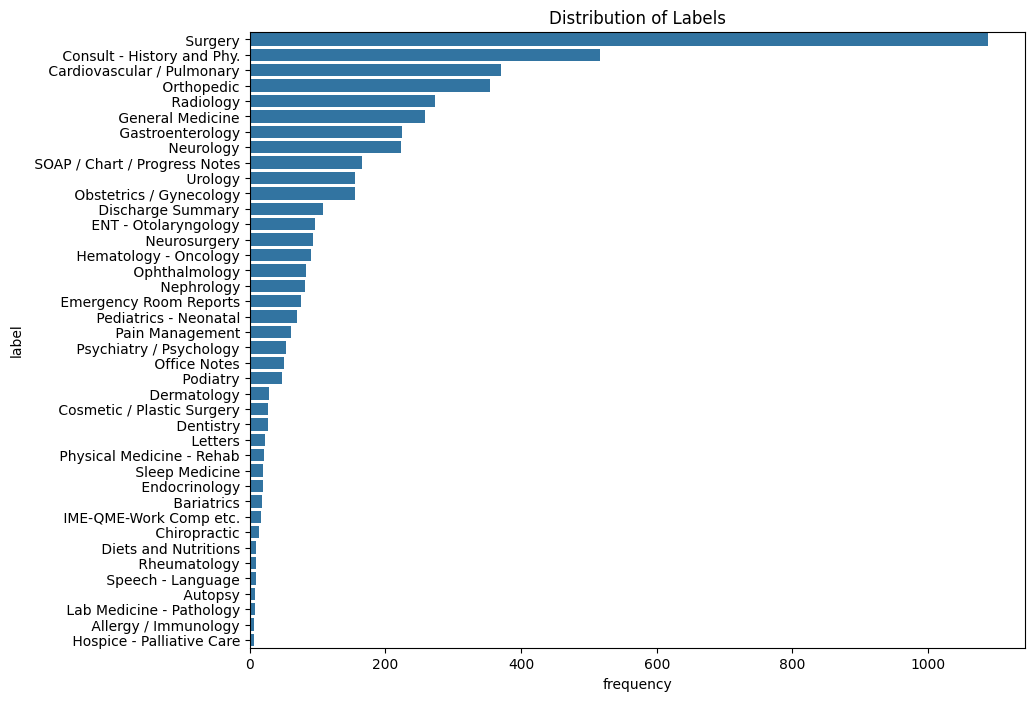

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# plot the label distribution
label_frequencies = df.label.value_counts()

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.barplot(
	x=label_frequencies.values,
	y=label_frequencies.index,
	ax=ax
)
ax.set_title('Distribution of Labels')
ax.set_xlabel('frequency')
ax.set_ylabel('label')
plt.show()

This shows how unbalanced the dataset is 

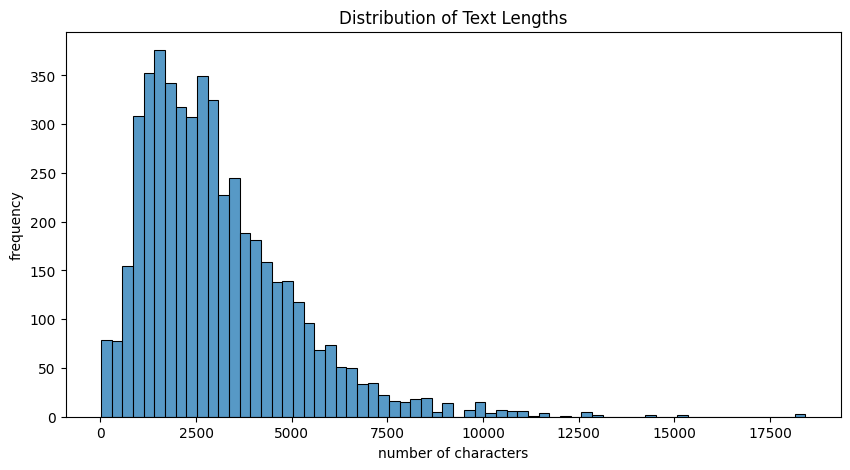

In [4]:
# plot the distribution of text lengths
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
sns.histplot(
	df.text_length,
	ax=ax
)
ax.set_title('Distribution of Text Lengths')
ax.set_xlabel('number of characters')
ax.set_ylabel('frequency')
plt.show()

C:\Users\Reby\AppData\Local\Temp\ipykernel_12900\3443563669.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = df.groupby(['label', 'text_length_bin']).size().unstack().fillna(0)


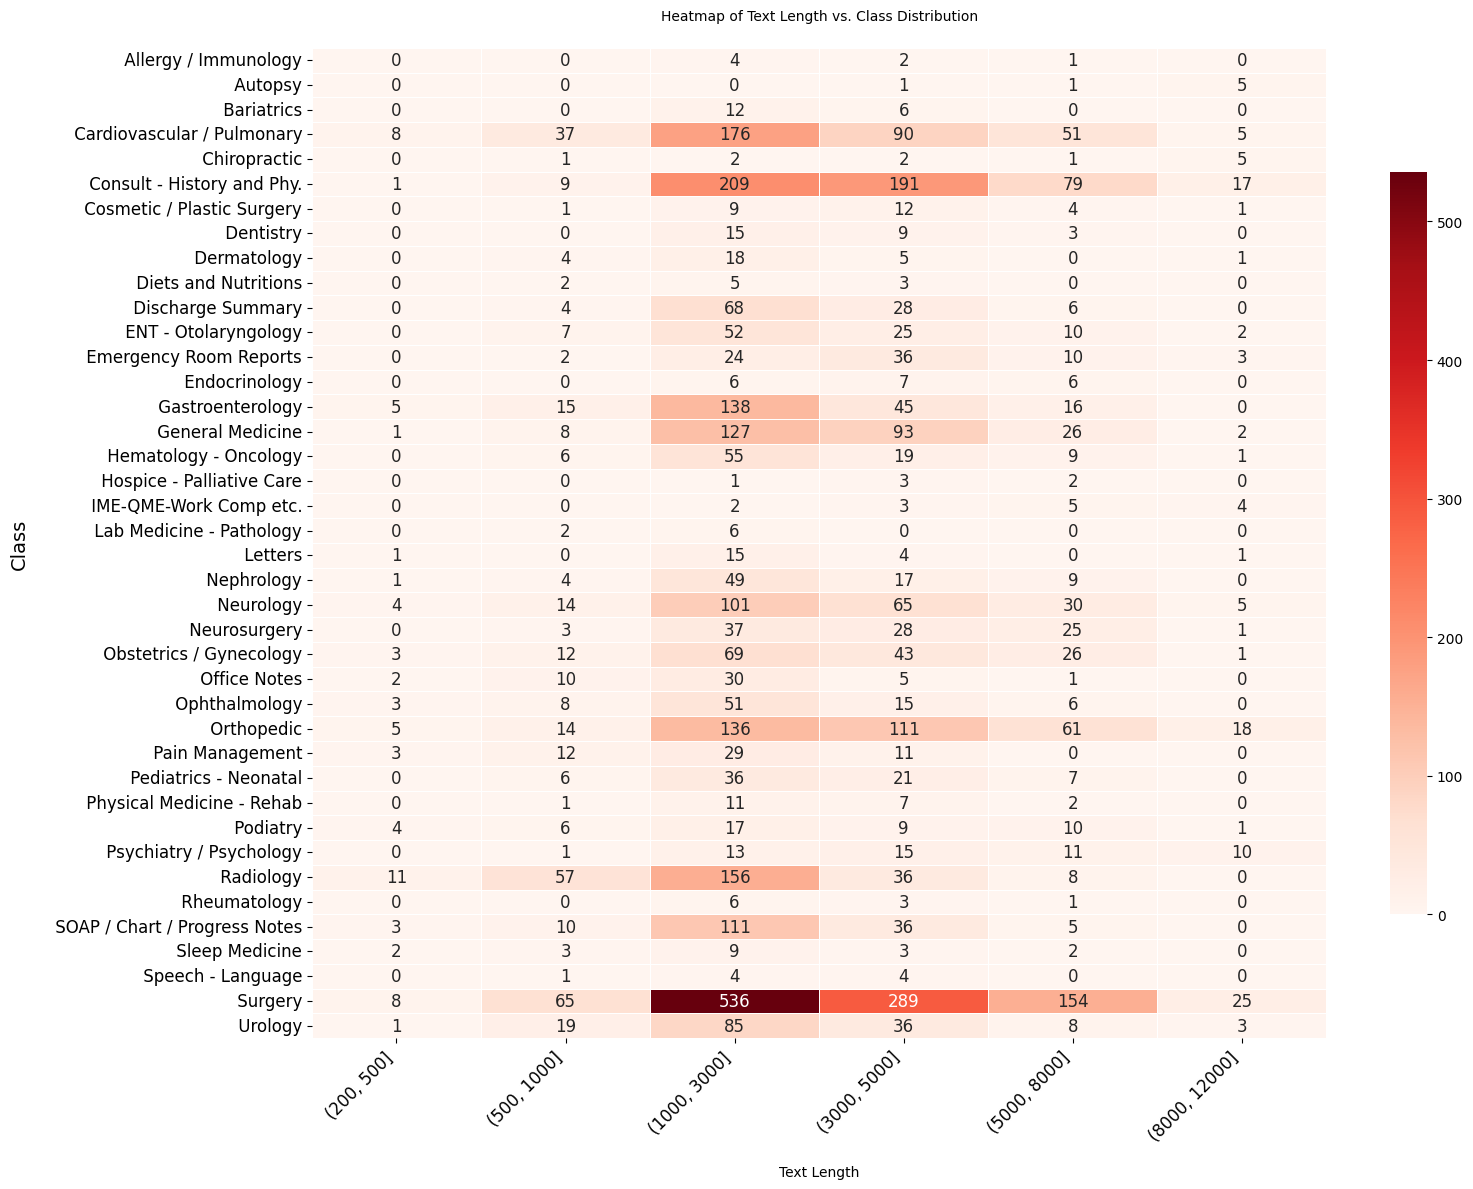

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df['text_length'] = df['text'].apply(len)

bins = [200, 500, 1000, 3000, 5000, 8000, 12000] 
df['text_length_bin'] = pd.cut(df['text_length'], bins=bins, labels=['(200, 500]', '(500, 1000]', '(1000, 3000]', '(3000, 5000]', '(5000, 8000]', '(8000, 12000]'])

pivot_table = df.groupby(['label', 'text_length_bin']).size().unstack().fillna(0)

plt.figure(figsize=(16, 12))

cmap = sns.color_palette("Reds", as_cmap=True)

sns.heatmap(pivot_table, annot=True, cmap=cmap, fmt=".0f",
            linewidths=.5, cbar_kws={"shrink": 0.75}, 
            annot_kws={"size": 12})

plt.title('Heatmap of Text Length vs. Class Distribution', fontsize=10, pad=20)
plt.xlabel('Text Length', fontsize=10, labelpad=15)
plt.ylabel('Class', fontsize=14, labelpad=15)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


Most texts are in the range 1000-3000

### determining the national language(s) used

In [6]:
# !pip install langdetect
from langdetect import detect

df['language'] = df['text'].apply(lambda x: detect(x))
unique_languages = df['language'].unique()

# create a dictionary text samples : language
language_counts = {}
for lang in unique_languages:
    count = len(df[df['language'] == lang])
    language_counts[lang] = count
print(language_counts)


{'en': 4953, 'so': 2, 'pt': 3, 'de': 2, 'nl': 2, 'tl': 2, 'ro': 2}


The majority of samples are english texts 

### Reading through 100+ samples

In [7]:
#samples = df.sample(100)['text']
samples = df.sample(1)['text']
for sample in samples:
    print(sample)

SUBJECTIVE: , She is a 79-year-old female who came in with acute cholecystitis and underwent attempted laparoscopic cholecystectomy 8 days ago.  The patient has required conversion to an open procedure due to difficult anatomy.  Her postoperative course has been lengthened due to a prolonged ileus, which resolved with tetracycline and Reglan.  The patient is starting to improve, gain more strength.  She is tolerating her regular diet.,PHYSICAL EXAMINATION:,VITAL SIGNS:  Today, her temperature is 98.4, heart rate 84, respirations 20, and BP is 140/72.,LUNGS:  Clear to auscultation.  No wheezes, rales, or rhonchi.,HEART:  Regular rhythm and rate.,ABDOMEN:  Soft, less tender.,LABORATORY DATA:,  Her white count continues to come down.  Today, it is 11.6, H&H of 8.8 and 26.4, platelets 359,000.  We have ordered type and cross for 2 units of packed red blood cells.  If it drops below 25, she will receive a transfusion.  Her electrolytes today show a glucose of 107, sodium 137, potassium 4.0,

-  Style and Structure:
    * Clinical and detailed: The texts follow a typical clinical documentation format, detailing both subjective complaints and objective findings. They delineate the assessment and subsequent plans, maintaining clarity and specificity. Example: "She feels as though she may have some allergies at night. Most of her symptoms occur then, not during the day." describes a patient's symptoms in a straightforward, clinical manner. 

    * Segmented: Each narrative is divided into various segments, which can range from 'Objective' to 'Impression.' Each segment has its own set of specifics, aiding in clarity and organization.
Example: Under the heading "REVIEW OF SYSTEMS:", various body systems are listed with associated findings or symptoms.

-  Vocabulary:
     * Medical Terminology: such as "rhinorrhea," "thyromegaly," "otoscopy," "Rinne test," and "arthroplasty." but also clinical descriptions with sentences like "well-developed, well-nourished," and "in no distress" are standard clinical descriptors.

- Spelling:
    * Most terms are correctly spelled, but a careful proofreading can ensure the absence of typos. For instance, "mammogram which was normal recently" may benefit from a more grammatically sound structure.

- Noteworthy Characteristics:

    * Acronyms: The text often resorts to acronyms like "HEENT," "GI," and "GU" to denote various systems of the body - common in medical narratives to provide concise information.

    * Punctuation: The use of commas and periods is consistent, especially to list symptoms or clinical findings.

    * Measurements: The text uses exact measurements where necessary, like "2 cm in length" or "24 mg dose bid."

    * Clinical tests and examinations: frequently includes specific clinical tests (e.g., "DIX-HALLPIKE" or "FRENZEL GLASSES EXAMINATION") and their outcomes for a comprehensive overview of the patient's health.

    * Recommendations and follow-ups: Each narrative concludes with specific recommendations or plans for the patient, based on the assessments made.



Some sentences can be revised for better coherence and grammar. For instance, "She had a mammogram which was normal recently" could be changed to "She recently had a mammogram, which was normal." Uniformity in patient descriptions would also be needed, some descriptions provide the ethnicity and gender of the patient ("77-year-old Hispanic male"), others do not. Ensuring uniformity across narratives can help in consistent data representation.

In [8]:
# find headers in a given text
import re
from nltk.tokenize import sent_tokenize

def find_headers(text):
    """Find headers in a given text"""
    potential_headers = re.findall(r'([A-Z\s]+:)', text)
    # in uppercase and end with colon
    return [header for header in potential_headers if header.isupper()]



df['headers'] = df['text'].apply(find_headers)

unique_headers_set = set()
df['headers'].apply(unique_headers_set.update)
unique_headers_list = list(unique_headers_set)

print(unique_headers_list)


['HPI:', '  BIMANUAL:', 'FALL RISK ASSESSMENT:', 'CRITICAL CARE NOTE:', 'OPINION:', 'TOTAL MEDICATIONS DURING PROCEDURE:', 'SPECIMEN:', 'SHX:', 'DIAGNOSES ON ADMISSION:', 'RECREATIONAL PURSUITS:', 'FLUIDS RECEIVED:', 'PERIRECTAL ABSCESS:', 'INVASIVE LINES:', 'FAMILY PSYCHIATRIC HISTORY:', '  HEIGHT:', 'PLANS:', 'PAST LABORATORY EVALUATION:', 'PATIENT STATUS:', 'LIVER:', 'CURRENT OCCUPATION:', 'DISCHARGE:', 'CURRENT MEDICATIONS:', 'ED COURSE:', 'SPIROMETRY:', 'SECONDARY DISCHARGE DIAGNOSES:', 'DEVELOPMENTAL HISTORY:', 'REASON FOR CONSULT:', 'GAIT:', 'COMPARISONS:', 'FEMALE GENITAL SYSTEM:', 'ESTIMATED DATE OF DELIVERY:', 'DETAILS OF THE PROCEDURE:', 'TEE:', 'AORTIC VALVE:', 'SENSATION:', 'PROTOCOL:', 'HISTORY:', 'PROCEDURES  PERFORMED:', ' CXR:', 'RATIONALE FOR TREATMENT PLAN:', 'INDICATION FOR OPERATION:', '  LYMPHATICS:', 'OPERATION PERFORMED:', 'SMOKING EXPOSURE:', 'ADDITIONAL INSTRUCTIONS:', 'PRIMARY DIAGNOSIS:', 'COMPLICATION:', 'NONCORONARY CARDIAC STRUCTURE:', ' III:', 'IDENTIFYI

In [64]:
df.head()

text  \
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
1  CLINICAL INDICATION:  ,Normal stress test.,PRO...   
2  FINDINGS:,Axial scans were performed from L1 t...   
3  PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...   
4  REASON FOR VISIT:  ,Elevated PSA with nocturia...   

                                              inputs  \
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
1  {'text': 'CLINICAL INDICATION:  ,Normal stress...   
2  {'text': 'FINDINGS:,Axial scans were performed...   
3  {'text': 'PREOPERATIVE DIAGNOSIS: , Blood loss...   
4  {'text': 'REASON FOR VISIT:  ,Elevated PSA wit...   

                                          prediction prediction_agent  \
0     [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla   
1              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
2            [{'label': ' Radiology', 'score': 1.0}]          Argilla   
3              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
4  [{'label': ' SOAP / Chart / Progress Notes', '...          Argilla   

  annotation annotation_agent  multi_label explanation  \
0       None             None        False        None   
1       None             None        False        None   
2       None             None        False        None   
3       None             None        False        None   
4       None             None        False        None   

                                     id metadata   status  \
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
1  0007edf0-1413-4b16-8212-3a13c2ab4e43     None  Default   
2  00097d1e-1357-4447-a39a-fe8f8b7c36ae     None  Default   
3  001622b6-0182-4fee-9881-ae15e81ce836     None  Default   
4  0029245f-8b45-4796-ba09-7760612289c6     None  Default   

             event_timestamp                metrics  \
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   
1 2022-12-07 09:33:53.387245  {'text_length': 1798}   
2 2022-12-07 09:35:25.277951  {'text_length': 1141}   
3 2022-12-07 09:34:15.982054  {'text_length': 1767}   
4 2022-12-07 09:34:59.528244  {'text_length': 1519}   

                            label  text_length text_length_bin language  \
0                Gastroenterology         1085    (1000, 3000]       en   
1                         Surgery         1798    (1000, 3000]       en   
2                       Radiology         1141    (1000, 3000]       en   
3                         Surgery         1767    (1000, 3000]       en   
4   SOAP / Chart / Progress Notes         1519    (1000, 3000]       en   

                                             headers  
0  [PREOPERATIVE DIAGNOSIS:, POSTOPERATIVE DIAGNO...  
1  [CLINICAL INDICATION:, PROCEDURES PERFORMED:, ...  
2                                        [FINDINGS:]  
3  [PREOPERATIVE DIAGNOSIS:, POSTOPERATIVE DIAGNO...  
4  [REASON FOR VISIT:, HISTORY:, IMPRESSION:, PLAN:]

In [9]:

header_counts_per_class = pd.DataFrame()

for label in df['label'].unique():
    subset = df[df['label'] == label]
    
    all_headers = [header for sublist in subset['headers'].tolist() for header in sublist]
    
 
    header_counts_per_class[label] = pd.Series(all_headers).value_counts()

header_counts_per_class = header_counts_per_class.fillna(0).T


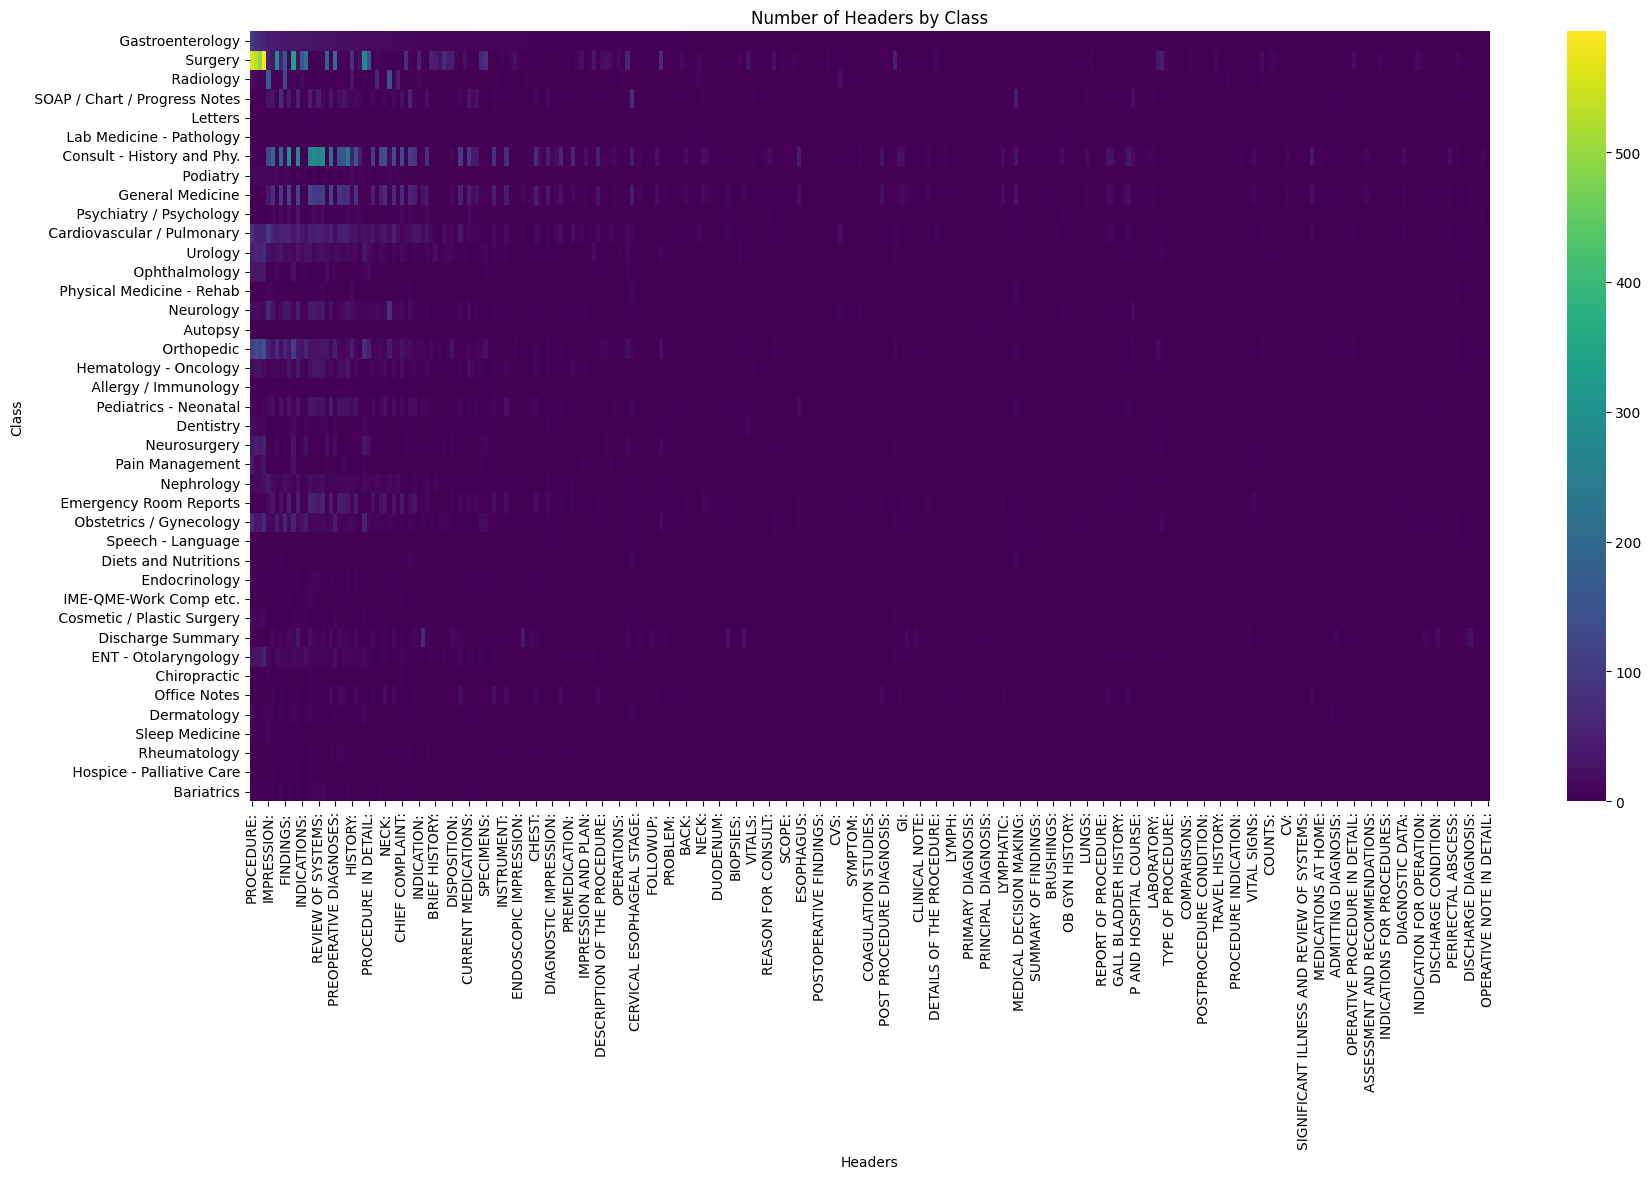

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(header_counts_per_class, cmap='viridis', annot=False, fmt='.0f')

plt.title("Number of Headers by Class")

plt.xticks(rotation=90)
plt.xlabel("Headers")
plt.ylabel("Class")
plt.show()

In [11]:
df.head()

text  \
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
1  CLINICAL INDICATION:  ,Normal stress test.,PRO...   
2  FINDINGS:,Axial scans were performed from L1 t...   
3  PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...   
4  REASON FOR VISIT:  ,Elevated PSA with nocturia...   

                                              inputs  \
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
1  {'text': 'CLINICAL INDICATION:  ,Normal stress...   
2  {'text': 'FINDINGS:,Axial scans were performed...   
3  {'text': 'PREOPERATIVE DIAGNOSIS: , Blood loss...   
4  {'text': 'REASON FOR VISIT:  ,Elevated PSA wit...   

                                          prediction prediction_agent  \
0     [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla   
1              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
2            [{'label': ' Radiology', 'score': 1.0}]          Argilla   
3              [{'label': ' Surgery', 'score': 1.0}]          Argilla   
4  [{'label': ' SOAP / Chart / Progress Notes', '...          Argilla   

  annotation annotation_agent  multi_label explanation  \
0       None             None        False        None   
1       None             None        False        None   
2       None             None        False        None   
3       None             None        False        None   
4       None             None        False        None   

                                     id metadata   status  \
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
1  0007edf0-1413-4b16-8212-3a13c2ab4e43     None  Default   
2  00097d1e-1357-4447-a39a-fe8f8b7c36ae     None  Default   
3  001622b6-0182-4fee-9881-ae15e81ce836     None  Default   
4  0029245f-8b45-4796-ba09-7760612289c6     None  Default   

             event_timestamp                metrics  \
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   
1 2022-12-07 09:33:53.387245  {'text_length': 1798}   
2 2022-12-07 09:35:25.277951  {'text_length': 1141}   
3 2022-12-07 09:34:15.982054  {'text_length': 1767}   
4 2022-12-07 09:34:59.528244  {'text_length': 1519}   

                            label  text_length text_length_bin language  \
0                Gastroenterology         1085    (1000, 3000]       en   
1                         Surgery         1798    (1000, 3000]       en   
2                       Radiology         1141    (1000, 3000]       en   
3                         Surgery         1767    (1000, 3000]       en   
4   SOAP / Chart / Progress Notes         1519    (1000, 3000]       en   

                                             headers  
0  [PREOPERATIVE DIAGNOSIS:, POSTOPERATIVE DIAGNO...  
1  [CLINICAL INDICATION:, PROCEDURES PERFORMED:, ...  
2                                        [FINDINGS:]  
3  [PREOPERATIVE DIAGNOSIS:, POSTOPERATIVE DIAGNO...  
4  [REASON FOR VISIT:, HISTORY:, IMPRESSION:, PLAN:]

In [12]:
import pandas as pd

average_lengths = df.groupby('label')['text_length'].mean()

# standardize text length
df['standardized_text_length'] = df.apply(lambda row: row['text_length'] / average_lengths[row['label']], axis=1)


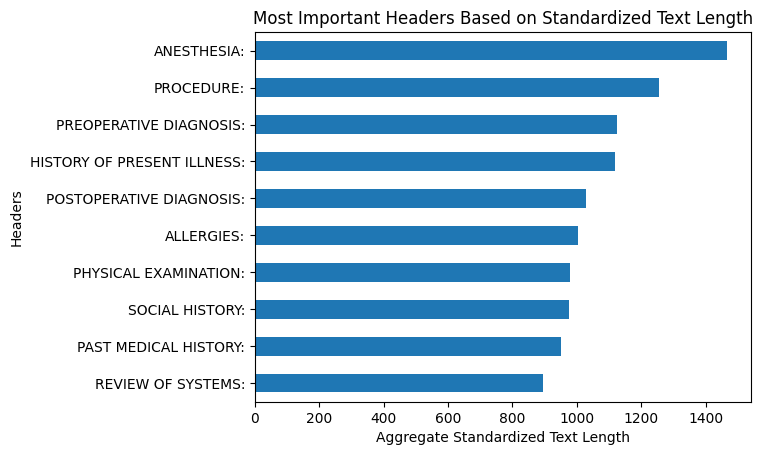

In [13]:
df = df.explode('headers')

# group by headers - sum standardized text lengths
agg_lengths = df.groupby('headers')['standardized_text_length'].sum().sort_values(ascending=False)

# top 10 headers
agg_lengths.head(10).plot(kind='barh')
plt.title('Most Important Headers Based on Standardized Text Length')
plt.xlabel('Aggregate Standardized Text Length')
plt.ylabel('Headers')
plt.gca().invert_yaxis()  # To have the most important header on top
plt.show()

Header Counts:
headers
ANESTHESIA:                    1284
PROCEDURE:                     1260
PREOPERATIVE DIAGNOSIS:        1134
POSTOPERATIVE DIAGNOSIS:       1051
HISTORY OF PRESENT ILLNESS:     954
                               ... 
UTERUS:                           1
ACCESSORY SPLEEN:                 1
COLON:                            1
URINARY BLADDER:                  1
POSTPROCEDURE EVALUATION:         1
Name: count, Length: 1891, dtype: int64

Header Classes:
headers
  ABDOMEN:         Obstetrics / Gynecology,  General Medicine,  ...
  AWAKE:                                 Sleep Medicine,  Neurology
  AXILLA:          Hematology - Oncology,  SOAP / Chart / Progre...
  AXIS I:          Psychiatry / Psychology,  Consult - History a...
  AXIS II:         Psychiatry / Psychology,  Consult - History a...
                                        ...                        
WORKUP:            Consult - History and Phy.,  Gastroenterology...
WOUND CLOSURE:                          

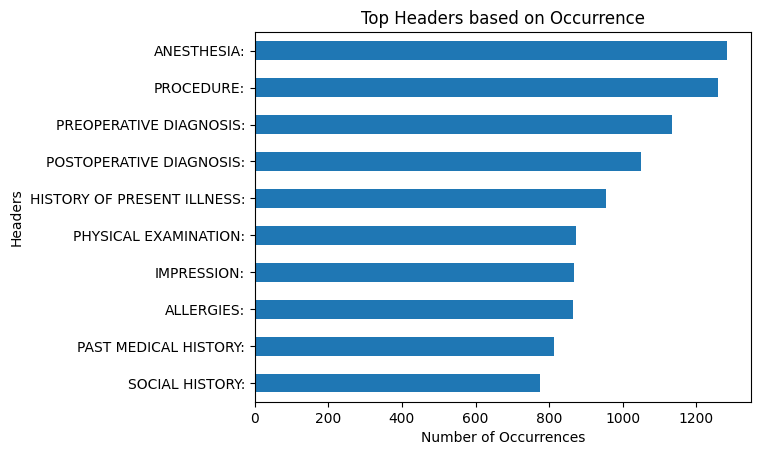

In [15]:

header_counts = df.explode('headers')['headers'].value_counts()
header_classes = df.explode('headers').groupby('headers')['label'].unique().apply(lambda x: ', '.join(x))

# co-occurrences
from itertools import combinations
co_occurrences = {}

for headers_list in df['headers']:
    if not isinstance(headers_list, list): 
        continue  
    for combo in combinations(headers_list, 2): # all possible combinations of 2 headers
        combo = tuple(sorted(combo))
        co_occurrences[combo] = co_occurrences.get(combo, 0) + 1
#
print("Header Counts:")
print(header_counts)
print("\nHeader Classes:")
print(header_classes)
print("\nCo-occurrences:")
sorted_co_occurrences = sorted(co_occurrences.items(), key=lambda x: x[1], reverse=True)
for pair, count in sorted_co_occurrences:
    print(pair, count)

#  top headers -  occurrences
top_headers = header_counts.head(10)
top_headers.plot(kind='barh')
plt.title('Top Headers based on Occurrence')
plt.xlabel('Number of Occurrences')
plt.ylabel('Headers')
plt.gca().invert_yaxis()
plt.show()


In [16]:
# df of top headers
df_top_headers = df[df['headers'].isin(top_headers.index)]
df_top_headers.head()

text  \
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
3  PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...   

                                              inputs  \
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
0  {'text': 'PREOPERATIVE DIAGNOSIS:,  Iron defic...   
3  {'text': 'PREOPERATIVE DIAGNOSIS: , Blood loss...   

                                       prediction prediction_agent annotation  \
0  [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla       None   
0  [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla       None   
0  [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla       None   
0  [{'label': ' Gastroenterology', 'score': 1.0}]          Argilla       None   
3           [{'label': ' Surgery', 'score': 1.0}]          Argilla       None   

  annotation_agent  multi_label explanation  \
0             None        False        None   
0             None        False        None   
0             None        False        None   
0             None        False        None   
3             None        False        None   

                                     id metadata   status  \
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
0  00001265-03e2-47b2-b6cf-bed32dad2fa9     None  Default   
3  001622b6-0182-4fee-9881-ae15e81ce836     None  Default   

             event_timestamp                metrics              label  \
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   Gastroenterology   
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   Gastroenterology   
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   Gastroenterology   
0 2022-12-07 09:38:43.003878  {'text_length': 1085}   Gastroenterology   
3 2022-12-07 09:34:15.982054  {'text_length': 1767}            Surgery   

   text_length text_length_bin language                   headers  \
0         1085    (1000, 3000]       en   PREOPERATIVE DIAGNOSIS:   
0         1085    (1000, 3000]       en  POSTOPERATIVE DIAGNOSIS:   
0         1085    (1000, 3000]       en                PROCEDURE:   
0         1085    (1000, 3000]       en                PROCEDURE:   
3         1767    (1000, 3000]       en   PREOPERATIVE DIAGNOSIS:   

   standardized_text_length  
0                  0.453877  
0                  0.453877  
0                  0.453877  
0                  0.453877  
3                  0.556787

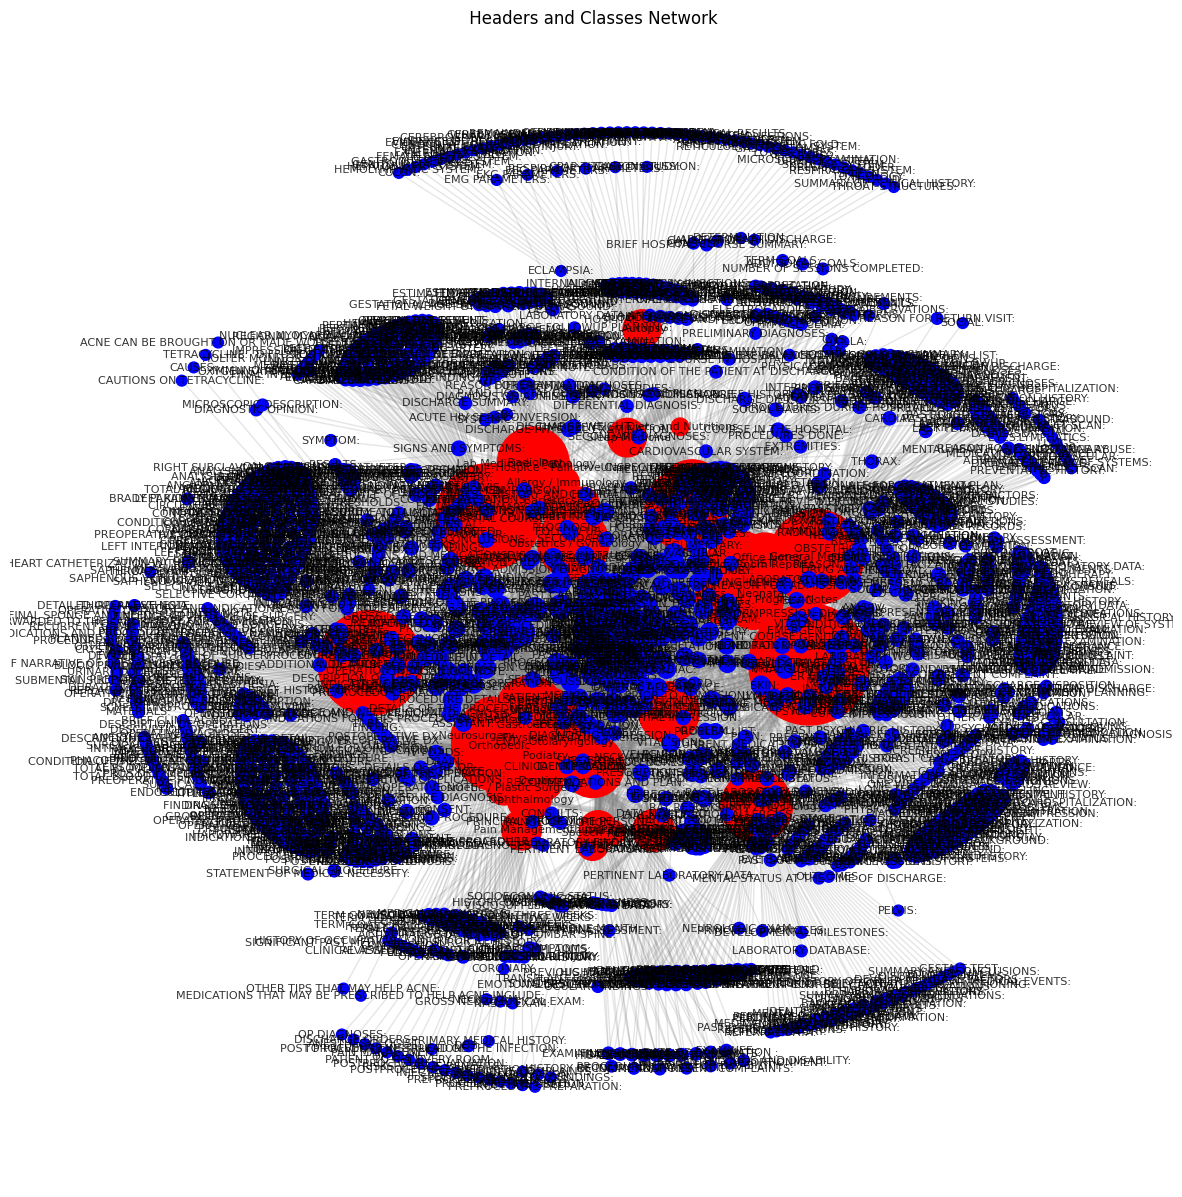

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        G.add_node(header, type='header', color='blue')
        G.add_node(med_class, type='class', color='red')
        G.add_edge(header, med_class)


degrees = dict(G.degree())
colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [50 + 10 * degrees[node] for node in G.nodes()]  
label_sizes = {node: (5 if degrees[node] < 3 else 10) for node in G.nodes()}  

plt.figure(figsize=(15, 15))
pos = nx.kamada_kawai_layout(G, weight=None)  

nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='grey')
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, font_size=8, alpha=0.8)

plt.title(' Headers and Classes Network')
plt.axis('off')
plt.show()


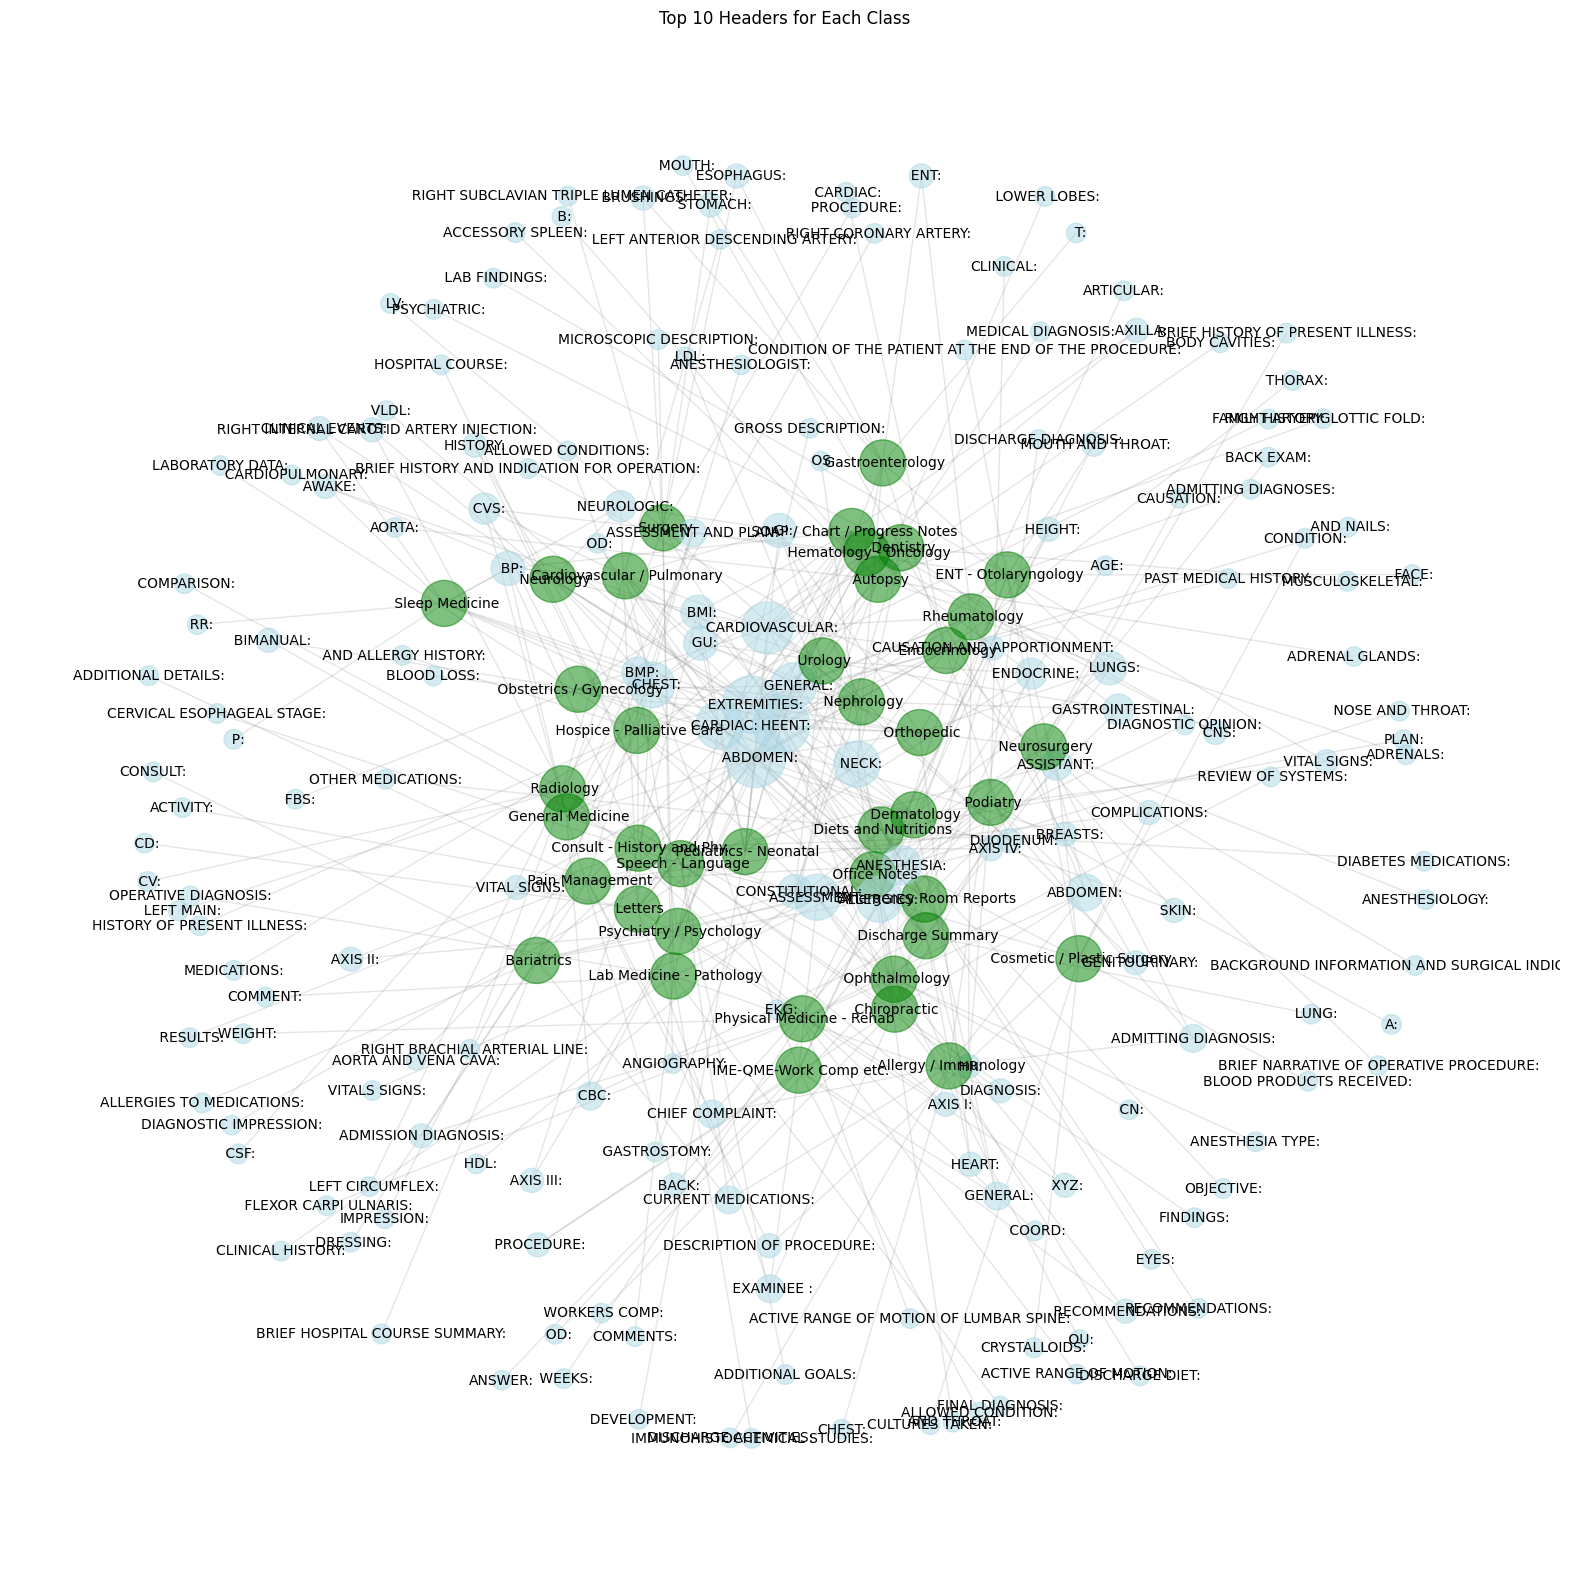

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter

G = nx.Graph()
class_header_counts = defaultdict(Counter)
for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        class_header_counts[med_class][header] += 1
top_headers_per_class = {med_class: counts.most_common(10) for med_class, counts in class_header_counts.items()}
for med_class, header_list in top_headers_per_class.items():
    for header, count in header_list:
        G.add_node(header, type='header', color='lightblue')
        G.add_node(med_class, type='class', color='green')
        G.add_edge(header, med_class, weight=count)

degrees = dict(G.degree())

colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [100 + 100 * degrees[node] for node in G.nodes()]  
plt.figure(figsize=(20, 20))
#pos = nx.kamada_kawai_layout(G, weight='weight')  
pos = nx.spring_layout(G, k=0.5, weight='weight')  

nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='grey')
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Top 10 Headers for Each Class')
plt.axis('off')
plt.show()


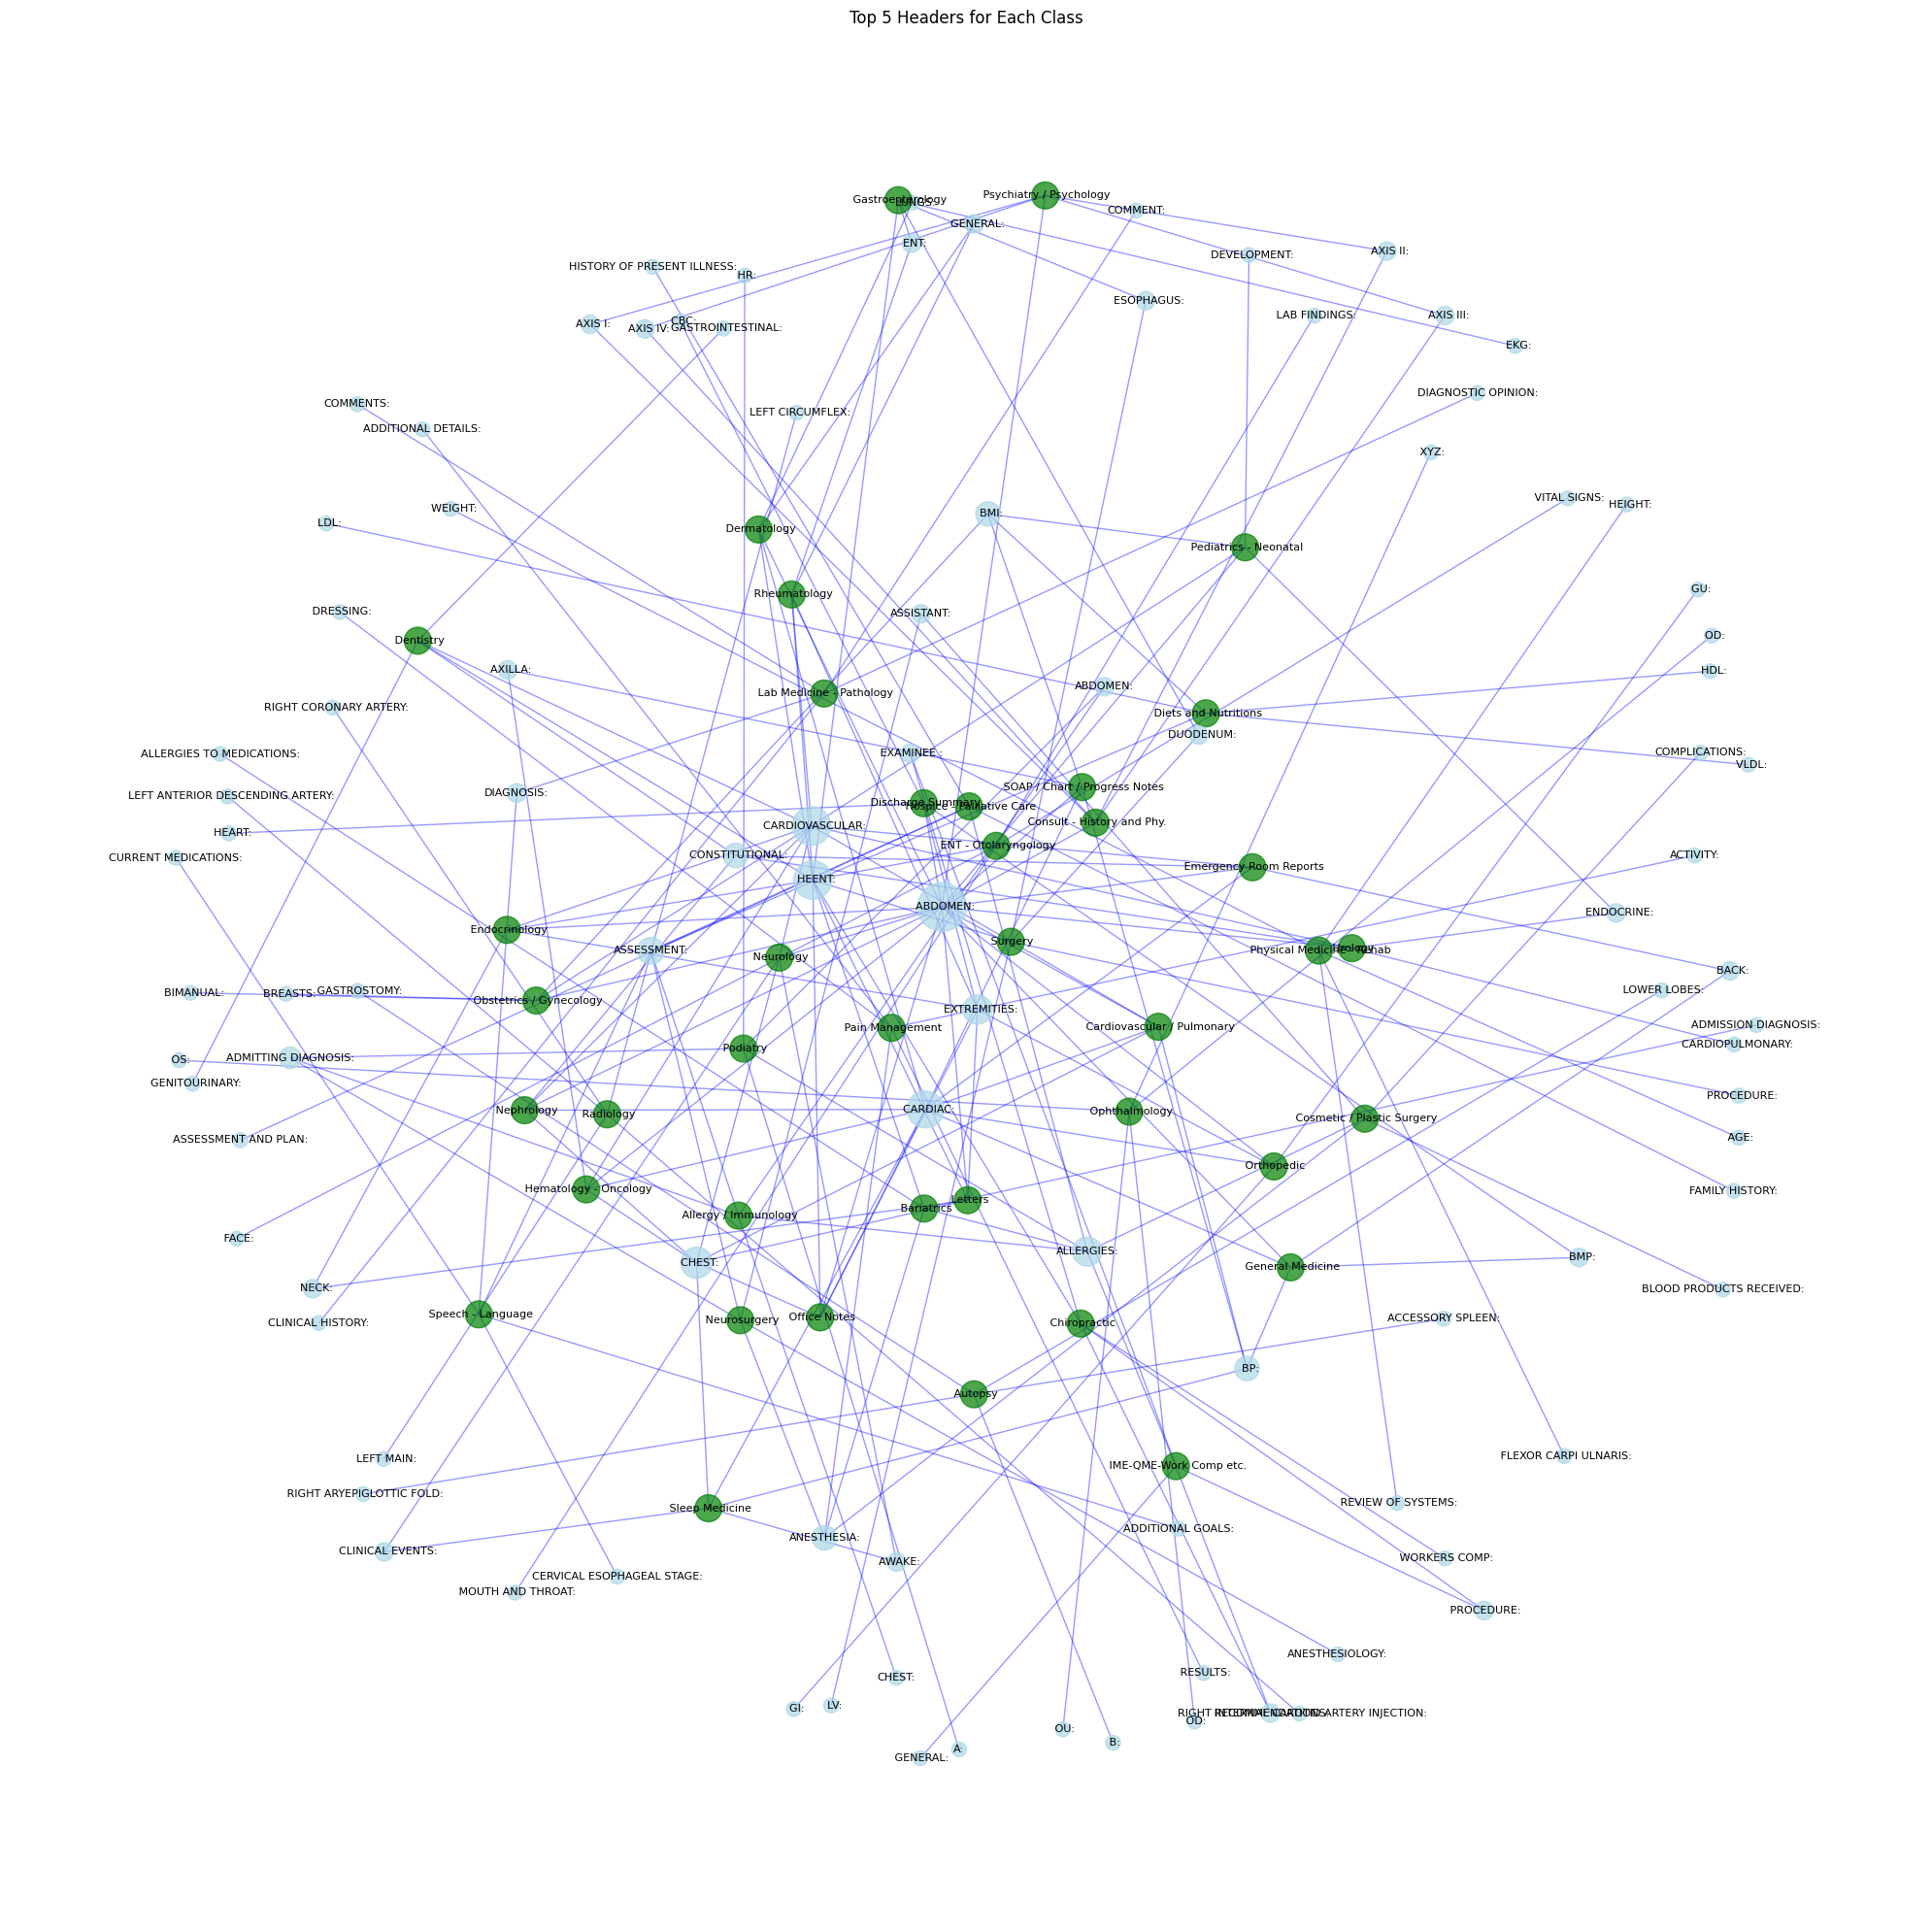

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter

G = nx.Graph()
class_header_counts = defaultdict(Counter)
for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        class_header_counts[med_class][header] += 1

top_headers_per_class = {med_class: counts.most_common(5) for med_class, counts in class_header_counts.items()}

for med_class, header_list in top_headers_per_class.items():
    for header, count in header_list:
        G.add_node(header, type='header', color='lightblue')
        G.add_node(med_class, type='class', color='green')
        G.add_edge(header, med_class, weight=count)

degrees = dict(G.degree())
colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [50 + 70 * degrees[node] for node in G.nodes()]  

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.7, weight='weight')  

nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='blue')
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes, alpha=0.7)  
nx.draw_networkx_labels(G, pos, font_size=8) 

plt.title('Top 5 Headers for Each Class')
plt.axis('off')
plt.tight_layout()
plt.show()


In [20]:
from IPython.core.display import display, HTML

C:\Users\Reby\AppData\Local\Temp\ipykernel_12900\2058709175.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [21]:

G = nx.Graph()

class_header_counts = defaultdict(Counter)
for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        class_header_counts[med_class][header] += 1


top_headers_per_class = {med_class: counts.most_common(5) for med_class, counts in class_header_counts.items()}

for med_class, header_list in top_headers_per_class.items():
    for header, count in header_list:
        G.add_node(header, type='header', color='lightblue')
        G.add_node(med_class, type='class', color='green')
        G.add_edge(header, med_class, weight=count, color='grey')


nt = Network(notebook=True, width='100%', height='800px', directed=False, bgcolor='#FFFFFF', font_color='black')
nt.barnes_hut()


nt.from_nx(G)

nt.toggle_physics(True)
nt.options = {
    "nodes": {
        "font": {
            "size": 9
        }
    },
    "interaction": {
        "hover": True
    },
    "edges": {
        "color": {
            "highlight": "red",
            "hover": "red"
        }
    },
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -2000,
            "centralGravity": 0.5,
            "springLength": 200,
            "springConstant": 0.05,
            "damping": 0.09,
            "avoidOverlap": 0.1
        },
        "minVelocity": 0.75
    }
}

nt.show('network.html')



NameError: name 'Network' is not defined

In [185]:
from IPython.core.display import display, HTML
from pyvis.network import Network
import networkx as nx
from collections import defaultdict, Counter

# Your previous code initializing the NetworkX graph...

# Create a pyvis Network
nt = Network(notebook=True, width='100%', height='800px', directed=False, bgcolor='#FFFFFF', font_color='black', cdn_resources='remote')  # Setting cdn_resources to 'remote'
nt.barnes_hut()

# Load the graph data from NetworkX graph
nt.from_nx(G)

# Your code for adjusting visualization and physics parameters...

# Save and display the visualization in the notebook
nt.show('network.html')
display(HTML(filename='network.html'))


network.html


C:\Users\Reby\AppData\Local\Temp\ipykernel_16024\200010596.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


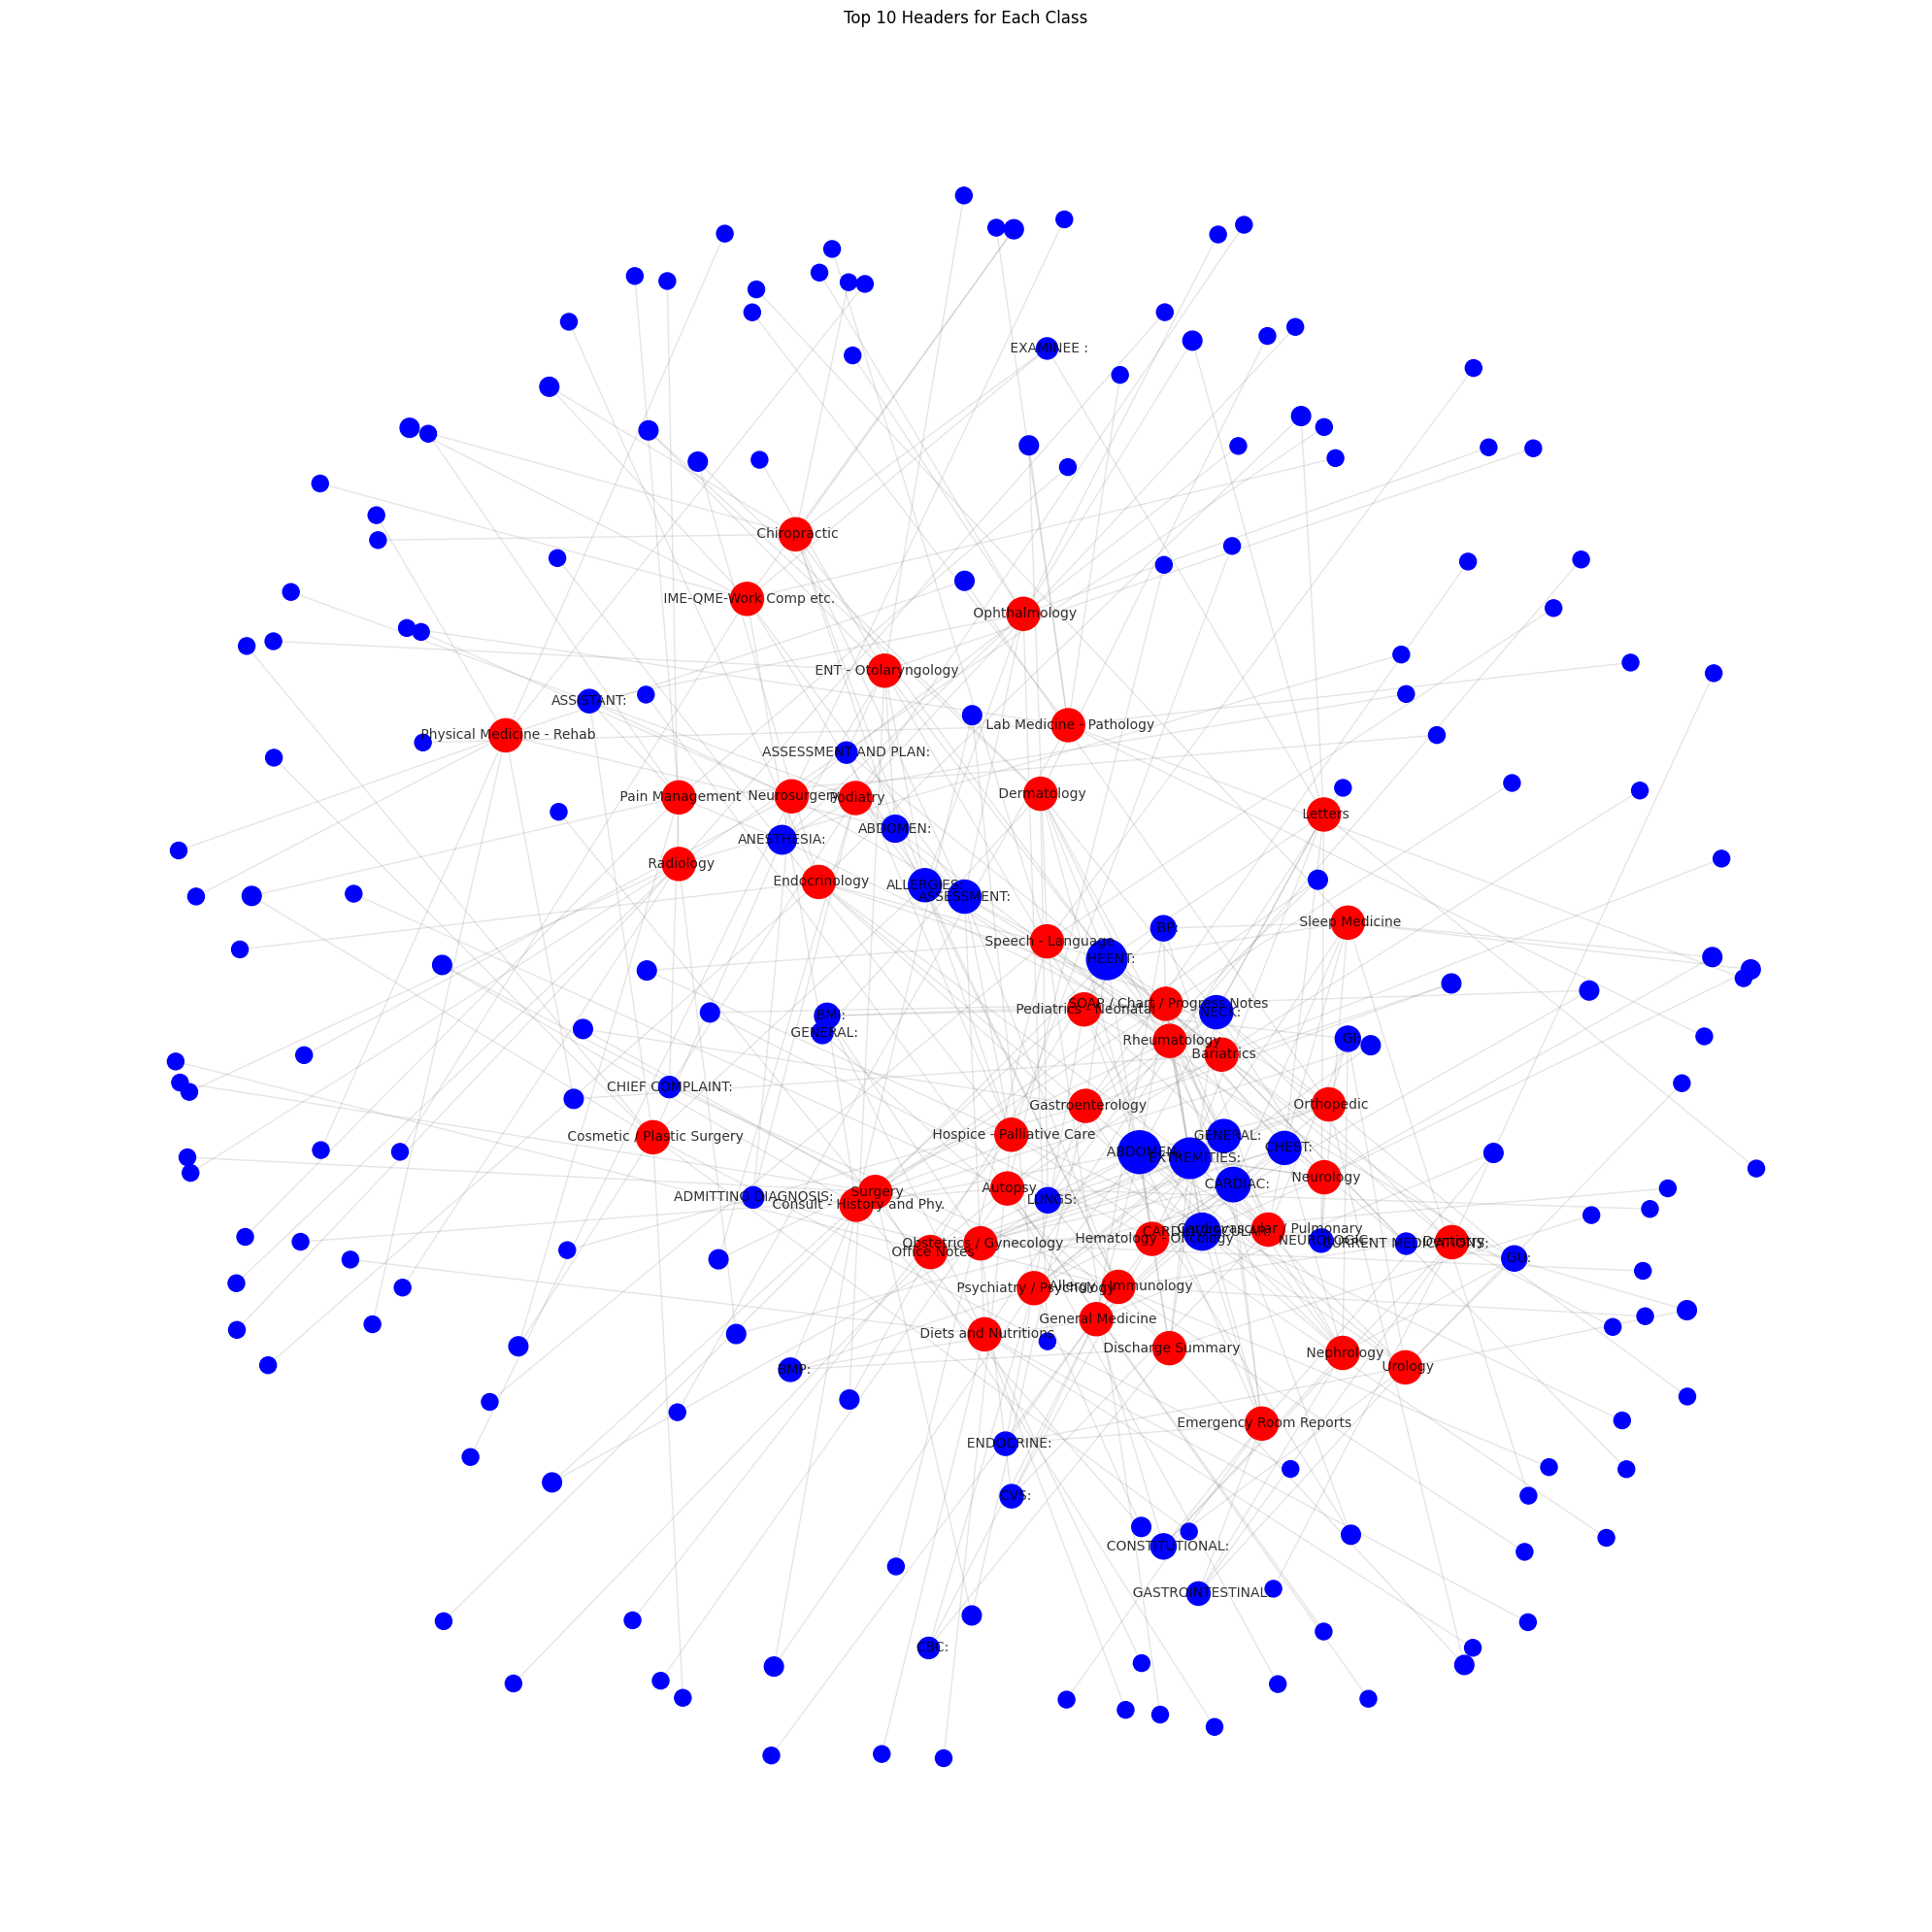

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter

G = nx.Graph()

class_header_counts = defaultdict(Counter)

for header, classes_str in header_classes.items():
    classes_list = classes_str.split(', ')
    for med_class in classes_list:
        class_header_counts[med_class][header] += 1

top_headers_per_class = {med_class: counts.most_common(10) for med_class, counts in class_header_counts.items()}

for med_class, header_list in top_headers_per_class.items():
    for header, count in header_list:
        G.add_node(header, type='header', color='blue')
        G.add_node(med_class, type='class', color='red')
        G.add_edge(header, med_class, weight=count)

degrees = dict(G.degree())

colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [100 + 50 * degrees[node] for node in G.nodes()]  
edge_alphas = [(i[2]['weight'] / max(dict(G.degree()).values())) for i in G.edges(data=True)]

labels = {node: node if degrees[node] > 2 else '' for node in G.nodes()}

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.5, weight='weight')  

nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='grey')
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, alpha=0.8)

plt.title('Top 10 Headers for Each Class')
plt.axis('off')
plt.tight_layout()
plt.show()


## A structured and flexible (configurable) processing pipeline

In [44]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re

class TextProcessingPipeline:

    language_mapping = {
        'en': 'english',
        'pt': 'portuguese',
        'de': 'german',
        'nl': 'dutch'
    }
    
    def __init__(self, language='en', tokenizer_type='word', stemmer_type='snowball', use_stemming=True, use_lemmatization=False, use_special_header=False):
        self.language = self.language_mapping.get(language, language)
        self.tokenizer = self._choose_tokenizer(tokenizer_type)
        self.stemmer = self._choose_stemmer(stemmer_type)
        self.lemmatizer = WordNetLemmatizer() if use_lemmatization and self.language == 'english' else None
        self.use_stemming = use_stemming
        self.use_special_header = use_special_header
        self.stop_words = set(stopwords.words(self.language))
    
    def _handle_special_headers(self, text):
        headers = unique_headers_list
        segments = {}
        for i, header in enumerate(headers):
            if header.lower() in text:
                start_idx = text.find(header.lower())
                end_idx = text.find(headers[i + 1].lower()) if i + 1 < len(headers) and headers[i + 1].lower() in text else None
                segments[header[:-1]] = text[start_idx + len(header):end_idx].strip() if end_idx else text[start_idx + len(header):].strip()
                
        return segments

    def _choose_tokenizer(self, tokenizer_type):
        if tokenizer_type == 'word':
            return word_tokenize
        elif tokenizer_type == 'sentence':
            return sent_tokenize
        elif tokenizer_type == 'regex':
            tokenizer = RegexpTokenizer(r'\w+')
            return tokenizer.tokenize
        else:
            raise ValueError('Invalid tokenizer type.')

    def _choose_stemmer(self, stemmer_type):
        if self.language not in ['english', 'portuguese', 'german', 'dutch']:
            raise ValueError('Stemming support is limited to English, Portuguese, German, and Dutch.')
        if stemmer_type == 'snowball':
            return SnowballStemmer(language=self.language)
        else:
            raise ValueError('Invalid stemmer type.')

    def process(self, text):
        #  headers
        if self.use_special_header:
            segments = self._handle_special_headers(text.lower())
            for header, content in segments.items():
                tokens = self.tokenizer(content)
                tokens = [token for token in tokens if token not in [',', '.', ':']]

                # normlaization
                if self.lemmatizer:
                    tokens = [self.lemmatizer.lemmatize(token.lower()) for token in tokens]
                elif self.use_stemming:
                    tokens = [self.stemmer.stem(token.lower()) for token in tokens]
                else:
                    tokens = [token.lower() for token in tokens]

                tokens = [token for token in tokens if token not in self.stop_words]
                
                segments[header] = tokens
            return segments

        # tokenization
        tokens = self.tokenizer(text)

        # remove unwanted characters
        tokens = [token for token in tokens if token not in [',', '.', ':','(',')','#','?','2','1','dr.']]
        
        
        # normalization: lowercase, stemming/lemmatization
        if self.lemmatizer:
            tokens = [self.lemmatizer.lemmatize(token.lower()) for token in tokens]
        elif self.use_stemming:
            tokens = [self.stemmer.stem(token.lower()) for token in tokens]
        else:
            tokens = [token.lower() for token in tokens]
        
        # remove stop words
        tokens = [token for token in tokens if token not in self.stop_words]
        
        return tokens


#### Text processing pipeline for English texts 
- NLTK Word tokenizer and Snowball stemmer and special headers handling (no lemmaitzation)
- Be aware letting it run takes several minutes = up to 7min

In [45]:
# Text processing pipeline for English texts using word tokenizer and Snowball stemmer and special headers handling

english_texts = df[df['language'] == 'en']
pipeline = TextProcessingPipeline(language='en', tokenizer_type='word', stemmer_type='snowball', use_lemmatization=False, use_special_header=True)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)

# original text vs processed text
print(english_texts[['text', 'processed_text']].head())

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Reby/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\Reby\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


- NLTK Sentence tokenizer and Snowball stemmer and no special headers handling and no lemmatization
- takes up to 6s

In [ ]:
pipeline = TextProcessingPipeline(language='en', tokenizer_type='sentence', stemmer_type='snowball', use_lemmatization=False, use_special_header=False)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


print(english_texts[['processed_text']].head())

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\4281618194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


- NLTK Regex tokenizer and Snowball stemmer and no special headers handling and no lemmatization
- takes up to 22s

In [ ]:
pipeline = TextProcessingPipeline(language='en', tokenizer_type='regex', stemmer_type='snowball', use_lemmatization=False, use_special_header=False)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


print(english_texts[['processed_text']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          processed_text
0                                                         [preoper, diagnosi, iron, defici, anemia, postop, diagnosi, diverticulosi, procedur, colonoscopi, medic, mac, procedur, olympus, pedi

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\3935858733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


- NLTK word tokenizer and no stemmer and no special headers handling - but lemmatization
- takes up to 22s

In [ ]:
pipeline = TextProcessingPipeline(language='en', tokenizer_type='word',use_stemming=False, use_lemmatization=True, use_special_header=False)
english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


print(english_texts[['processed_text']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        processed_text
0  [preoperative, diagnosis, iron, deficiency, anemia., postoperative, diagnosis,

C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1608101184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(pipeline.process)


## Calculate TFDs for different variants of the processing pipeline

Using pipeline variant #1


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_texts['processed_text'] = english_texts['text'].apply(variant.process)
C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


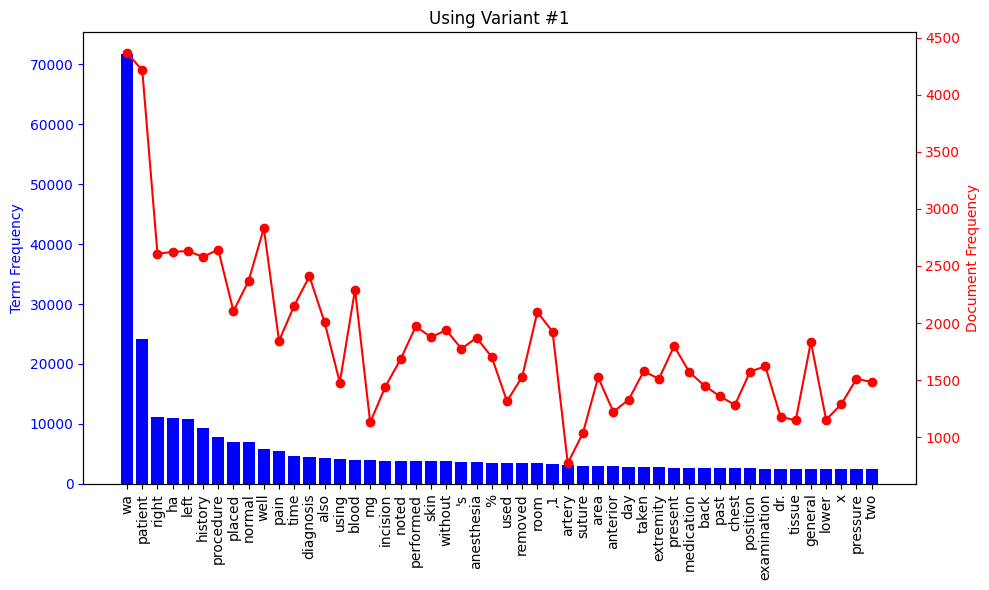


--------------------------------------------------

Using pipeline variant #2


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


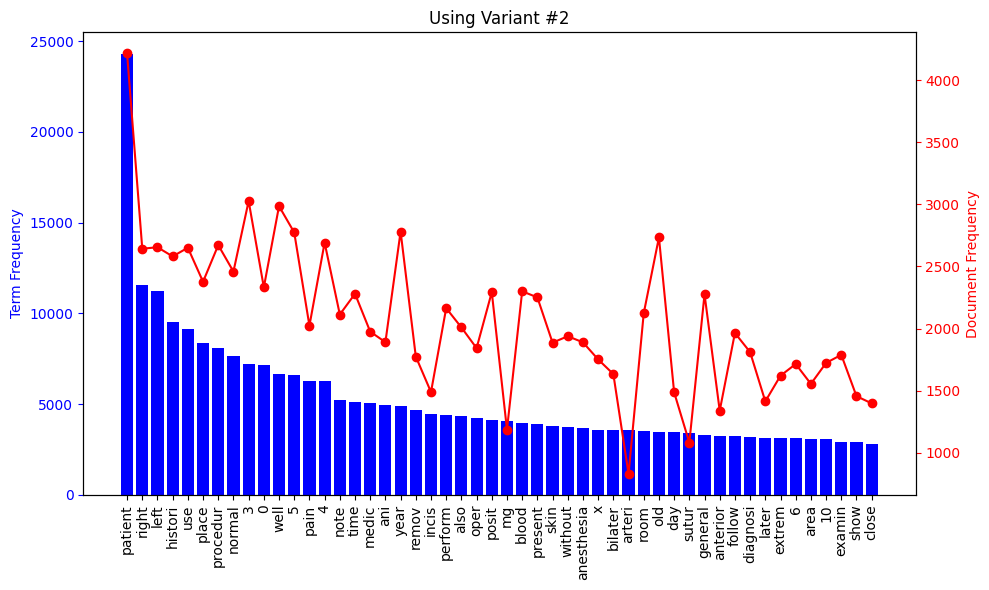


--------------------------------------------------

Using pipeline variant #3


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


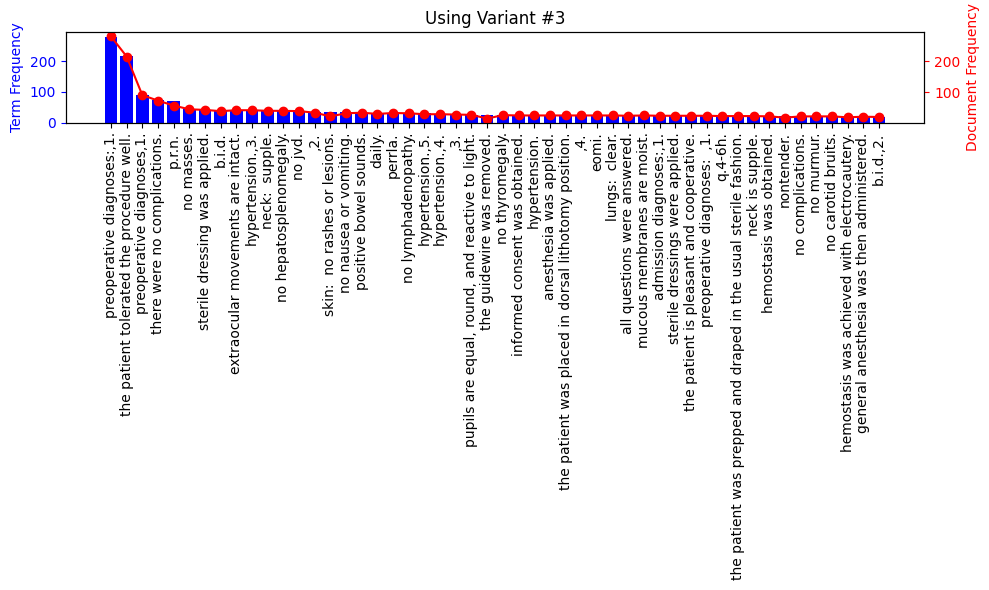


--------------------------------------------------

Using pipeline variant #4


C:\Users\Moritz\AppData\Local\Temp\ipykernel_17628\1679965611.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(terms, rotation=90)


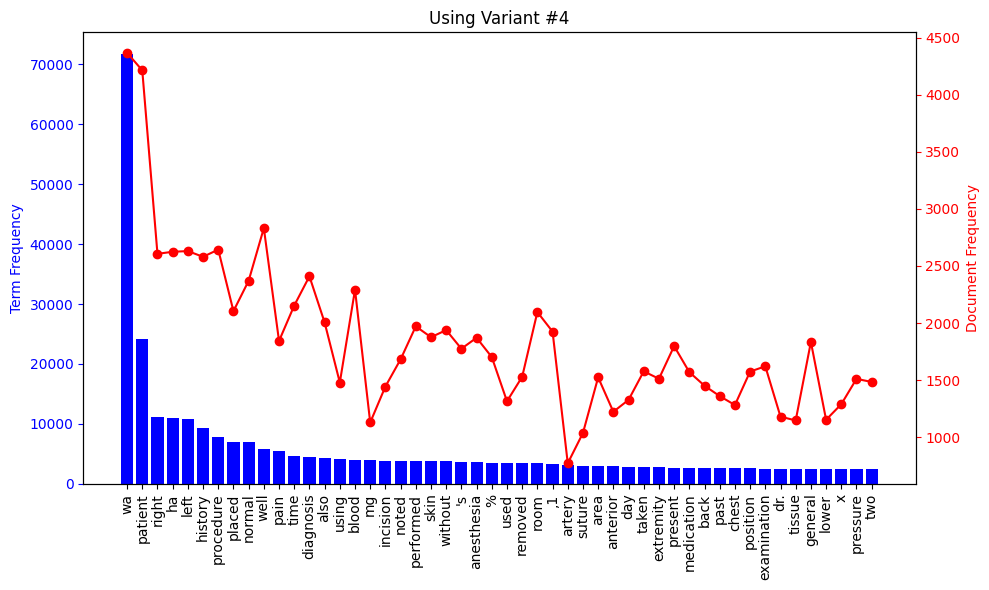


--------------------------------------------------



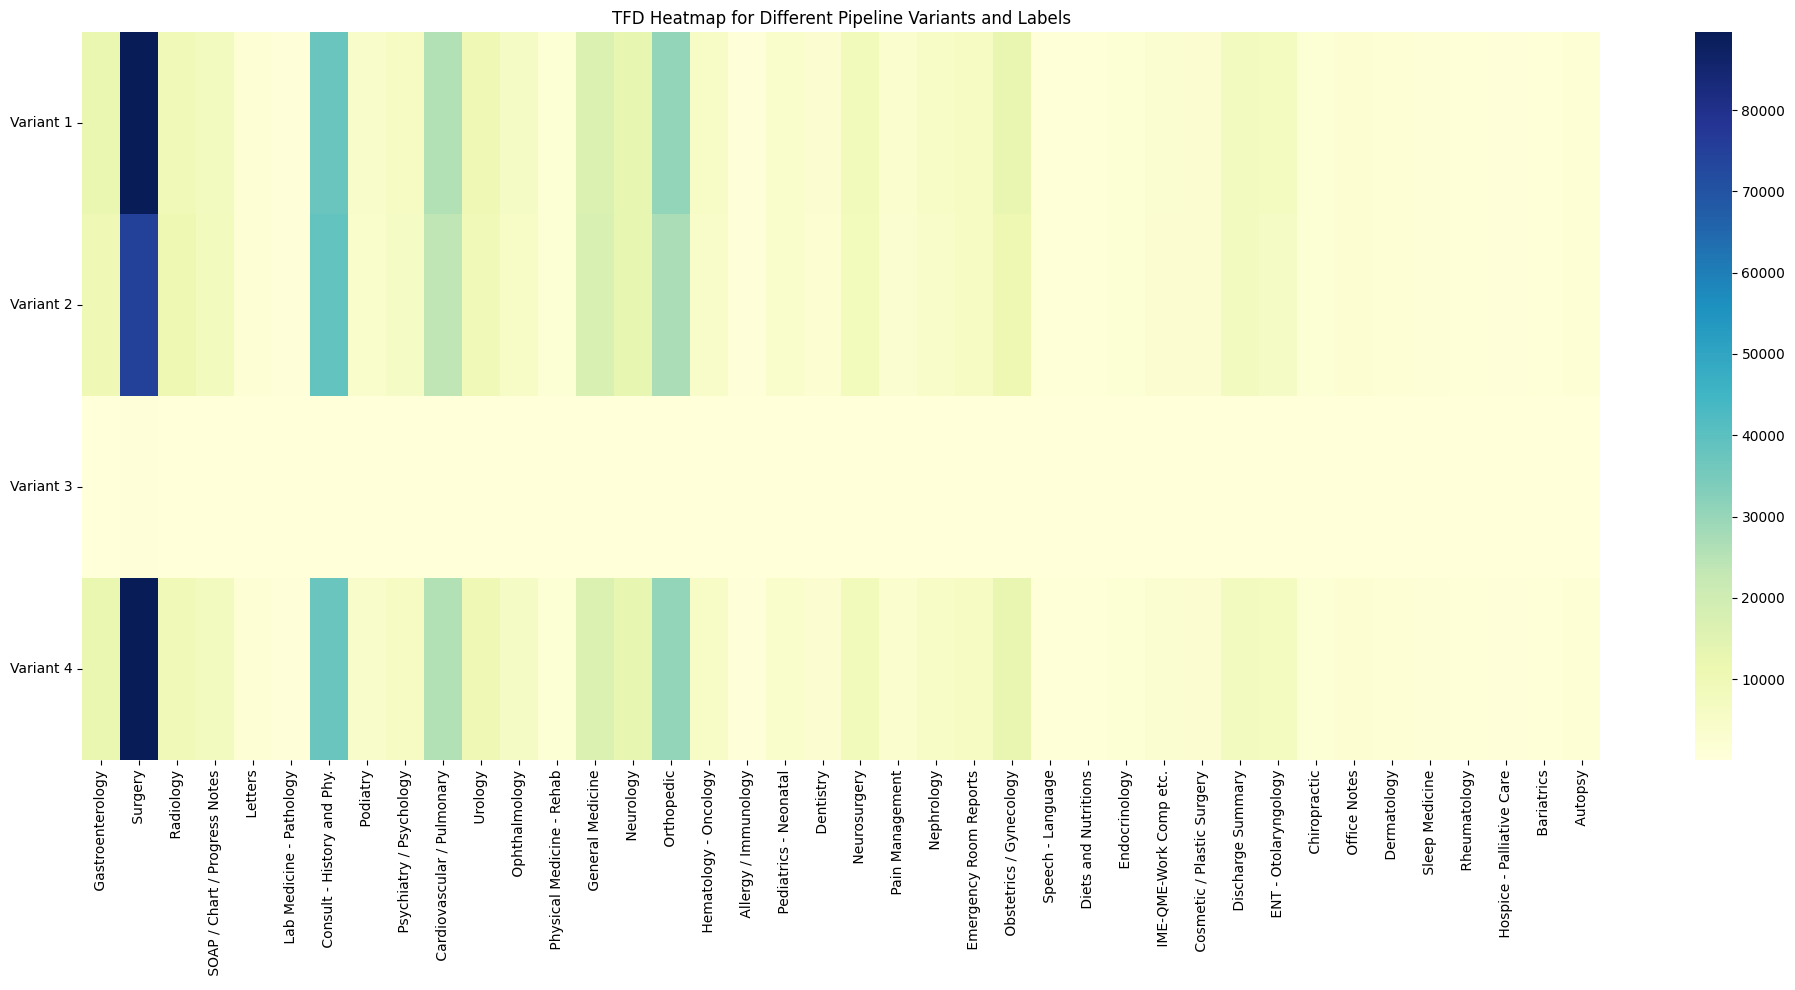

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
import seaborn as sns
import pandas as pd


def compute_document_frequency(texts):
    df = FreqDist()
    for text in texts:
        for term in set(text):  
            df[term] += 1
    return df

def plot_tf_and_df(tf, df, variant_index):
    N = 50
    terms, term_freqs = zip(*tf.most_common(N))
    doc_freqs = [df[term] for term in terms]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # bar plot for Term Frequency
    ax1.bar(terms, term_freqs, color='blue', label='Term Frequency')
    ax1.set_ylabel("Term Frequency", color='blue')
    ax1.tick_params(axis='y', colors='blue')
    
    #  line plot for Document Frequency
    ax2 = ax1.twinx()
    ax2.plot(terms, doc_freqs, color='red', marker='o', label='Document Frequency')
    ax2.set_ylabel("Document Frequency", color='red')
    ax2.tick_params(axis='y', colors='red')
    
    plt.title(f"Using Variant #{variant_index}")
    ax1.set_xticklabels(terms, rotation=90)
    plt.xticks(rotation=70)
    plt.tight_layout()  
    
    plt.show()

def plot_tfd(tf, variant_index):
    N = 50
    terms, freqs = zip(*tf.most_common(N))
    
    plt.figure(figsize=(10, 6))
    plt.bar(terms, freqs, color='blue')
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(f"Term Frequency Distribution for Variant #{variant_index}")
    plt.setp(plt.gca().get_xticklabels(), rotation=90)
    plt.tight_layout()  
    plt.show()

# different variants
pipeline_variants = [
    # TextProcessingPipeline(language='en', tokenizer_type='word', stemmer_type='snowball', use_lemmatization=False, use_special_header=True), # variant 1 - takes too long
    TextProcessingPipeline(language='en', tokenizer_type='word', stemmer_type='snowball', use_lemmatization=True, use_special_header=False), # variant 1
    TextProcessingPipeline(language='en', tokenizer_type='regex', stemmer_type='snowball', use_lemmatization=False, use_special_header=False),  # variant 2
    TextProcessingPipeline(language='en', tokenizer_type='sentence', stemmer_type='snowball', use_lemmatization=False, use_special_header=False), # variant 3
    TextProcessingPipeline(language='en', tokenizer_type='word', use_stemming=False, use_lemmatization=True, use_special_header=False) # variant 4
]

# zeros-filled dataframe to store TFD values for each label and variant
heatmap_data = pd.DataFrame(0, index=[f"Variant {i+1}" for i in range(len(pipeline_variants))], 
                            columns=english_texts['label'].unique())

for index, variant in enumerate(pipeline_variants, 1):
    print(f"Using pipeline variant #{index}")
    
    english_texts['processed_text'] = english_texts['text'].apply(variant.process)
    all_terms = [term for sublist in english_texts['processed_text'] for term in sublist]

    tf_per_class = {}  # Store TFD for each class
    
    tf = FreqDist(all_terms)
    df = compute_document_frequency(english_texts['processed_text'])

    plot_tf_and_df(tf, df, variant_index=index)

    unique_classes = english_texts['label'].unique()
    for class_label in unique_classes:
        class_texts = english_texts[english_texts['label'] == class_label]['processed_text']
        all_terms = [term for sublist in class_texts for term in sublist]
        tf = FreqDist(all_terms)

        N = 50
        _, term_freqs = zip(*tf.most_common(N))
        heatmap_data.at[f"Variant {index}", class_label] = sum(term_freqs)
    
    print("\n" + "-"*50 + "\n")

#  heatmap TFD
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt="d", annot_kws={"size": 10})
plt.title("TFD Heatmap for Different Pipeline Variants and Labels")
plt.xticks(rotation=90)  
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()



### Term Frequency Distribution Analysis using different text processing pipelines 

The heatmap provides insights into the Term Frequency Distributions (TFD) across four distinct pipeline variants when processing various labels

- Variant 1: uses word tokenization, snowball stemming, and lemmatization. This variant seems to capture a comprehensive set of terms, as indicated by its high TFD across most classes.
- Variant 2: uses regex tokenization combined with snowball stemming, but without lemmatization. the absence of lemmatization might result in different inflections of a word being treated separately, potentially dispersing the term frequencies.
- Variant 3: uses sentence tokenization with the inclusion of snowball stemming, but omits lemmatization. Sentence tokenization may yield fewer tokens, focusing more on the holistic understanding of content rather than individual terms.
- Variant 4: Uses word tokenization and lemmatization, but specifically avoids stemming.

Observations
- Surgery, as a label, has a notably high term frequency across all pipeline variants. This suggests that texts under this label might be more verbose or repetitive.
Variant 1 consistently yields higher term frequencies across most labels when compared to other variants, indicating its potential efficacy in capturing relevant terms.

- Other labels, like Dermatology and ENT, display low term frequencies across all variants, which could imply shorter texts or less repetitive terminology in these fields.

For tasks that require extensive term extraction and understanding of textual nuances, Variant 1 seems to be the most effective way whereas 3 is definitevly not ideal. 
Different pipeline - techniques therefore change the outcome! 


### You ca see other examples of changes of text pipline processing (and their term distribution)  below again: 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moritz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moritz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Moritz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


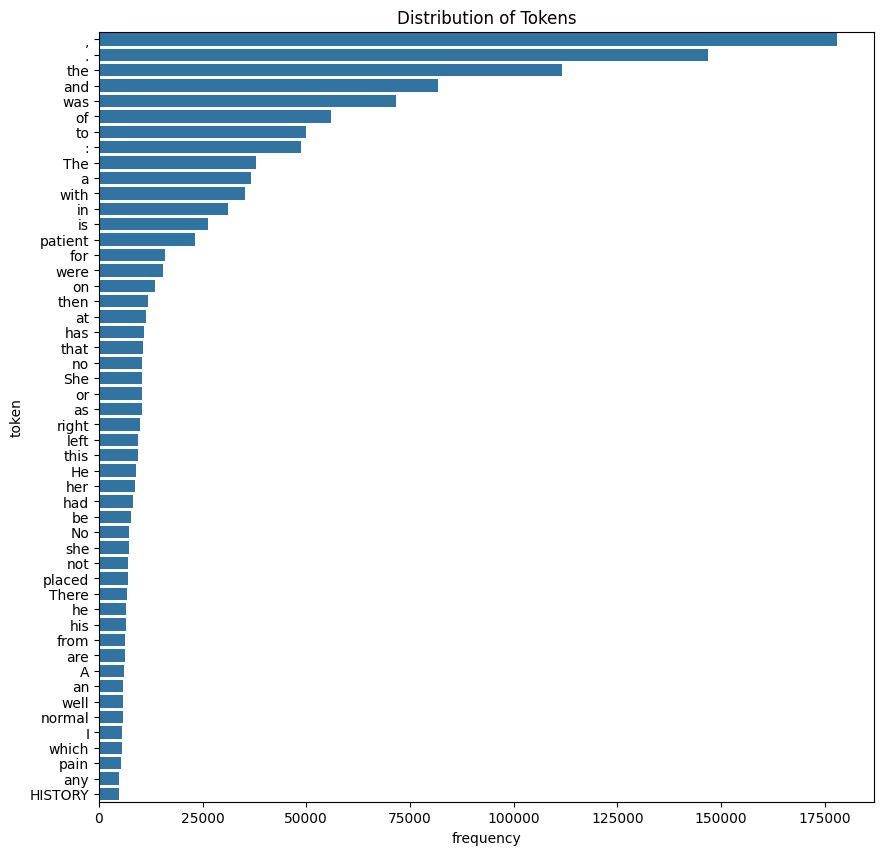

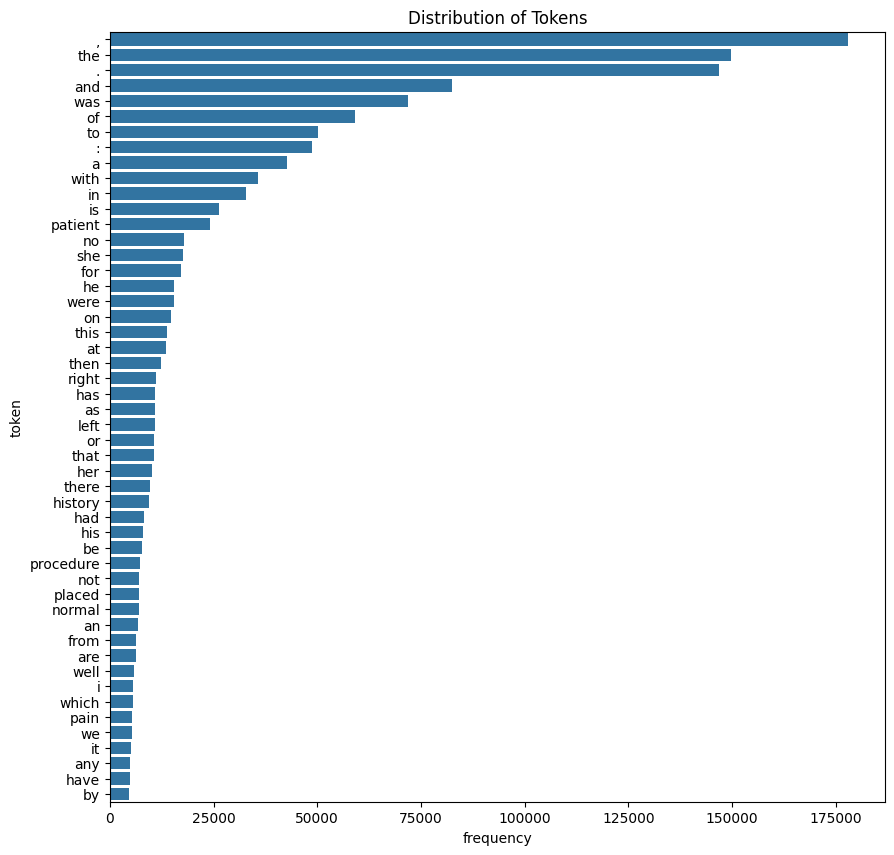

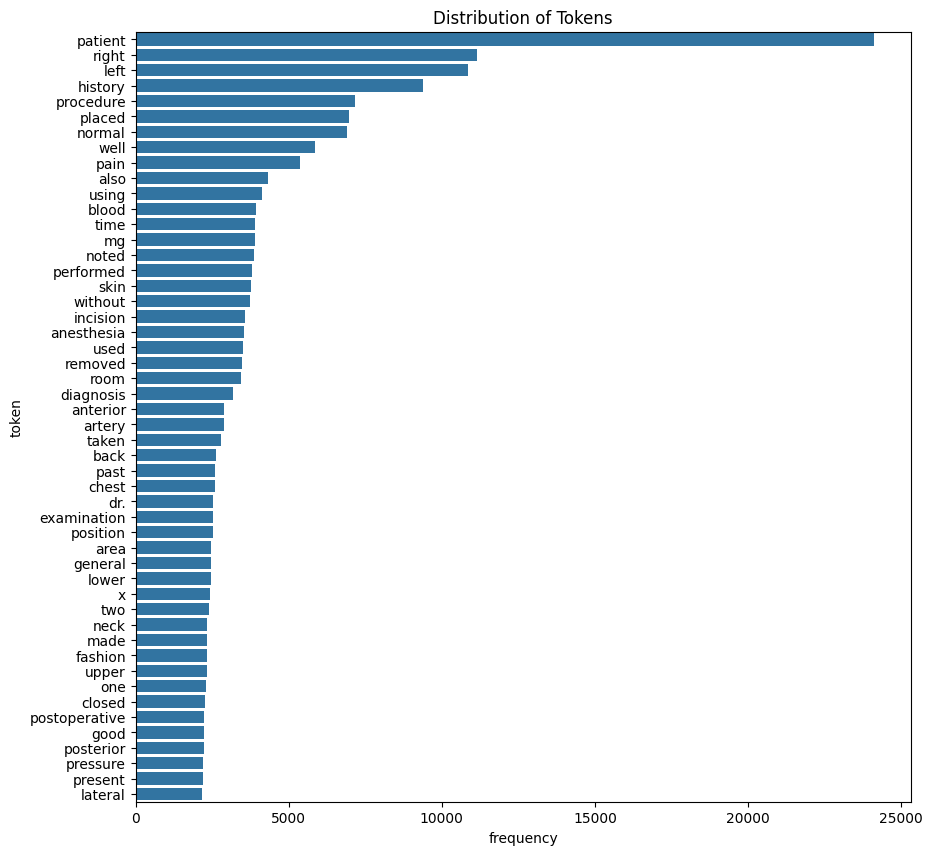

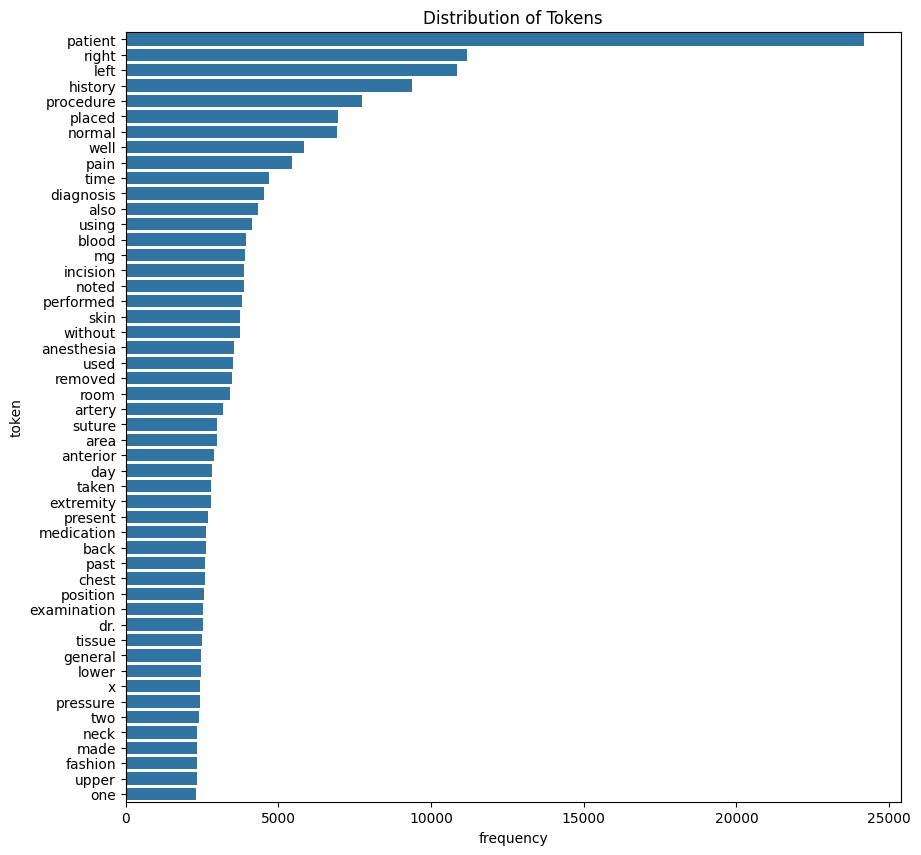

In [ ]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


data = load_dataset('argilla/medical-domain')['train']
df = data.to_pandas()

df['label'] = df.prediction.apply(lambda x: x[0]['label'])
df['text_length'] = df.metrics.apply(lambda x: x['text_length'])


label_frequencies = df.label.value_counts()



tokens = df.text.apply(func=word_tokenize).explode()


def plot_token_frequencies(tokens):
	token_frequencies = tokens.value_counts().head(50)
	fig, ax = plt.subplots(1, 1, figsize = (10, 10))
	sns.barplot(
		x=token_frequencies.values,
		y=token_frequencies.index,
		ax=ax
	)
	ax.set_title('Distribution of Tokens')
	ax.set_xlabel('frequency')
	ax.set_ylabel('token')
	plt.show()


plot_token_frequencies(tokens)


filtered_tokens = tokens.str.lower()
plot_token_frequencies(filtered_tokens)


filtered_tokens = filtered_tokens[~filtered_tokens.isin(stopwords.words('english'))]
filtered_tokens = filtered_tokens[filtered_tokens.str.match('[a-z]')]
plot_token_frequencies(filtered_tokens)


lemmatizer = WordNetLemmatizer()
filtered_tokens = filtered_tokens.apply(lambda x: lemmatizer.lemmatize(x))
plot_token_frequencies(filtered_tokens)


